## **March Madness Project**

# Gilbert Guyah
# Max Vasquez



**Installing Packages and Importing Data**

In [ ]:
!pip install kaggle
#!pip install kaggle --upgrade

In [ ]:

#Data Processing
import pandas as pd
from pathlib import Path

# linear algebra
import numpy as np 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib.patches import Circle, Rectangle, Arc
plt.style.use('seaborn-dark-palette')
mypal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # Grab the color pal



# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 67 bytes


In [ ]:
#https://www.kaggle.com/c/ncaam-march-mania-2021
!kaggle competitions download -c "ncaam-march-mania-2021"



In [ ]:
# View content
#%ls

In [ ]:
# Inflate zipped files
#!unzip MGameCities.csv.zip
#!unzip MEvents2015.csv.zip
#!unzip MEvents2016.csv.zip
#!unzip MEvents2017.csv.zip
#!unzip MEvents2018.csv.zip
#!unzip MEvents2019.csv.zip
#A!unzip MEvents2020.csv.zip
#!unzip MMasseyOrdinals.csv.zip
!unzip MRegularSeasonCompactResults.csv.zip
!unzip MRegularSeasonDetailedResults.csv.zip

Archive:  MRegularSeasonCompactResults.csv.zip
  inflating: MRegularSeasonCompactResults.csv  
Archive:  MRegularSeasonDetailedResults.csv.zip
  inflating: MRegularSeasonDetailedResults.csv  


In [ ]:
# Read data into pandas dataframes
# Data dictionary here:  https://www.kaggle.com/c/google-cloud-ncaa-march-madness-2020-division-1-mens-tournament/data
import pandas as pd
#cities = pd.read_csv('Cities.csv')                                    # provides a master list of cities that have been locations for games played
conferences = pd.read_csv('Conferences.csv')                          # Indicates the Division I conferences that have existed over the years since 1985. Each conference is listed with an abbreviation and a longer name
tourney_games = pd.read_csv('MConferenceTourneyGames.csv')            # Indicates which games were part of each year's post-season conference tournaments
#events2015 = pd.read_csv('MEvents2015.csv')                           # Each MEvents file lists the play-by-play event logs for more than 99.5% of games from that season. 
#events2016 = pd.read_csv('MEvents2016.csv')                           #      Each event is assigned to either a team or a single one of the team's players.
#events2017 = pd.read_csv('MEvents2017.csv')                           #           Thus if a basket is made by one player and an assist is credited to a second player, that would show up as two separate records
#events2018 = pd.read_csv('MEvents2018.csv')                           # See above
#MEvents = pd.read_csv('MEvents2019.csv')                           # See above
#Mevents2020 = pd.read_csv('MEvents2020.csv')                           # See above
#gamecities = pd.read_csv('MGameCities.csv')                           # Identifies all games, starting with the 2010 season, along with the city that the game was played in
#mm_ordinals = pd.read_csv('MMasseyOrdinals.csv')                      # Lists out rankings of teams going back to the 2002-2003 season, under a large number of different ranking system methodologies. 
t_results_c = pd.read_csv('MNCAATourneyCompactResults.csv')           # Identifies the game-by-game NCAA® tournament results for all seasons of historical data
t_results_d = pd.read_csv('MNCAATourneyDetailedResults.csv')          # Provides team-level box scores for many NCAA® tournaments, starting with the 2003 season.
slots = pd.read_csv('MNCAATourneySeedRoundSlots.csv')                 # Helps to represent the bracket structure in any given year
t_seeds = pd.read_csv('MNCAATourneySeeds.csv')                        # Identifies the seeds for all teams in each NCAA® tournament, for all seasons 
t_slots = pd.read_csv('MNCAATourneySlots.csv')                        # Identifies the mechanism by which teams are paired against each other, depending upon their seeds, as the tournament proceeds through its rounds. 
#players = pd.read_csv('MPlayers.csv')                                 # Lists players by player ID
r_results_c = pd.read_csv('MRegularSeasonCompactResults.csv')         # Identifies the game-by-game results for many seasons of historical data
r_results_d = pd.read_csv('MRegularSeasonDetailedResults.csv')        # Provides team-level box scores for many regular seasons of historical data, starting with the 2003 season
#samplesub = pd.read_csv('MSampleSubmissionStage1_2020.csv')          # Illustrates the submission file format for Stage 1
#seasons = pd.read_csv('MSeasons.csv')                                 # Identifies the different seasons included in the historical data, along with certain season-level properties
#st_results_c = pd.read_csv('MSecondaryTourneyCompactResults.csv')    # Indicates the final scores for the tournament games of "secondary" post-season tournaments: the NIT, CBI, CIT, and Vegas 16. 
#st_teams = pd.read_csv('MSecondaryTourneyTeams.csv')                 # identifies the teams that participated in post-season tournaments other than the NCAA® Tournament
#coaches = pd.read_csv('MTeamCoaches.csv')                             # Indicates the head coach for each team in each season, including a start/finish range of DayNum's to indicate a mid-season coaching change
conferences = pd.read_csv('MTeamConferences.csv')                     # Indicates the conference affiliations for each team during each season
teams = pd.read_csv('MTeams.csv')                                     # Identifies the different college teams present in the dataset
team_spelling = pd.read_csv('MTeamSpellings.csv',encoding='cp1252')   # Indicates alternative spellings of many team names. 
team_names=teams[['TeamID','TeamName']]

In [ ]:
t_results_d['Season']

0       2003
1       2003
2       2003
3       2003
4       2003
        ... 
1110    2019
1111    2019
1112    2019
1113    2019
1114    2019
Name: Season, Length: 1115, dtype: int64

In [ ]:
teams

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2021
1,1102,Air Force,1985,2021
2,1103,Akron,1985,2021
3,1104,Alabama,1985,2021
4,1105,Alabama A&M,2000,2021
...,...,...,...,...
366,1467,Merrimack,2020,2021
367,1468,Bellarmine,2021,2021
368,1469,Dixie St,2021,2021
369,1470,Tarleton St,2021,2021


**Exploratory Data Analysis**



In [ ]:
t_results_d.info

<bound method DataFrame.info of       Season  DayNum  WTeamID  WScore  LTeamID  ...  LAst LTO  LStl  LBlk  LPF
0       2003     134     1421      92     1411  ...    16  15     5     0   22
1       2003     136     1112      80     1436  ...    12  17    10     3   15
2       2003     136     1113      84     1272  ...    11  12     2     5   18
3       2003     136     1141      79     1166  ...    20  21     6     6   21
4       2003     136     1143      76     1301  ...    16  14     5     8   19
...      ...     ...      ...     ...      ...  ...   ...  ..   ...   ...  ...
1110    2019     146     1120      77     1246  ...    14  14     5     5   19
1111    2019     146     1277      68     1181  ...    14  17     4     9    9
1112    2019     152     1403      61     1277  ...     6  11     1     2   15
1113    2019     152     1438      63     1120  ...     9   5     3     3   12
1114    2019     154     1438      85     1403  ...     9   8     6     3   18

[1115 rows x 34 col

In [ ]:
r_results_d  = \
    t_results_d  \
    .merge(teams[['TeamName', 'TeamID']],
           left_on='WTeamID',
           right_on='TeamID',
           validate='many_to_one') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'WTeamName'}) \
    .merge(teams[['TeamName', 'TeamID']],
           left_on='LTeamID',
           right_on='TeamID') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'LTeamName'})

No handles with labels found to put in legend.


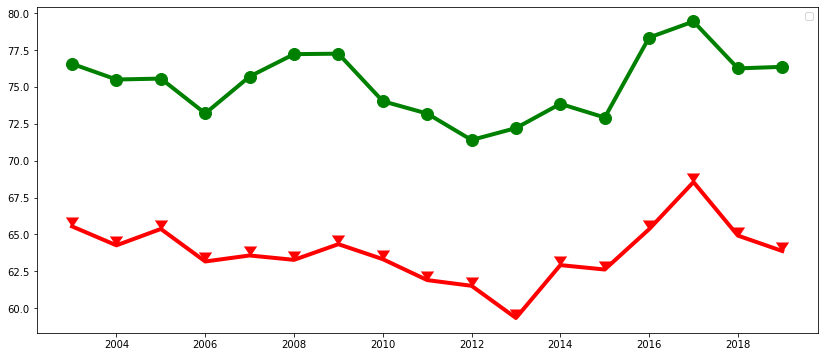

In [ ]:
# Winning and Losing score Average over the years
x = t_results_d .groupby('Season')[['WScore','LScore']].mean()

fig = plt.gcf()
fig.set_size_inches(14, 6)
plt.plot(x.index,x['WScore'],marker='o', markerfacecolor='green', markersize=12, color='green', linewidth=4)
plt.plot(x.index,x['LScore'],marker=7, markerfacecolor='red', markersize=12, color='red', linewidth=4)
plt.legend()

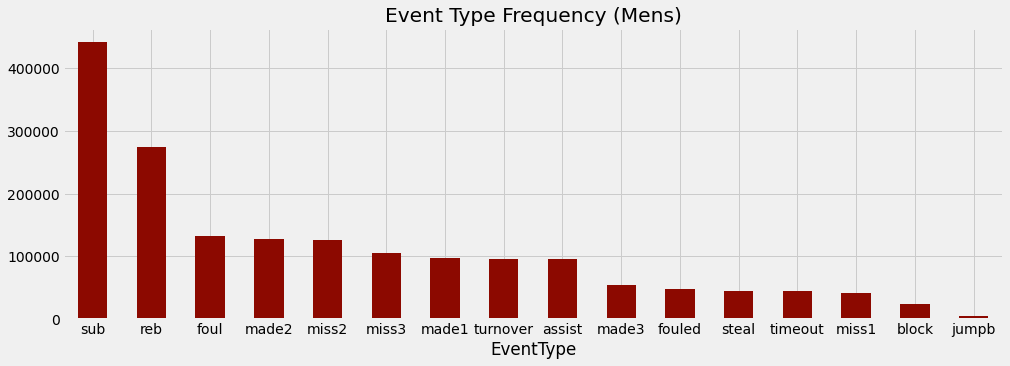

In [ ]:
# Event Types
plt.style.use('fivethirtyeight')
MEvents['counter'] = 1
MEvents.groupby('EventType')['counter'] \
    .sum() \
    .sort_values(ascending=False) \
    .plot(kind='bar',
          figsize=(15, 5),
         color=mypal[2],
         title='Event Type Frequency (Mens)')
plt.xticks(rotation=0)
plt.show()

In [ ]:
r_results_c = \
    r_results_c \
    .merge(teams[['TeamName', 'TeamID']],
           left_on='WTeamID',
           right_on='TeamID',
           validate='many_to_one') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'WTeamName'}) \
    .merge(teams[['TeamName', 'TeamID']],
           left_on='LTeamID',
           right_on='TeamID') \
    .drop('TeamID', axis=1) \
    .rename(columns={'TeamName': 'LTeamName'})

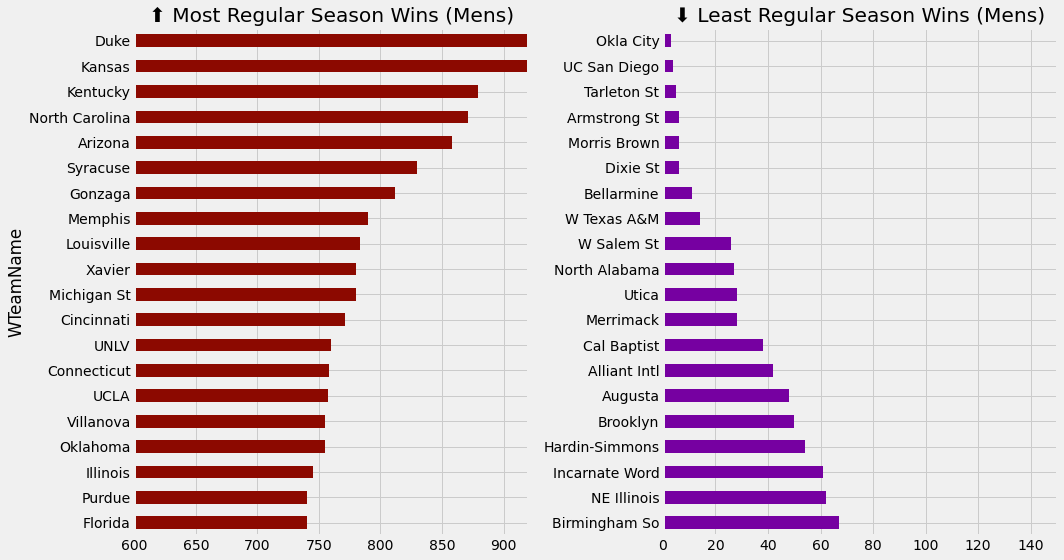

In [ ]:
plt.style.use('fivethirtyeight')
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
r_results_c['counter'] = 1
r_results_c.groupby('WTeamName')['counter'] \
    .count() \
    .sort_values() \
    .tail(20) \
    .plot(kind='barh',
          title='⬆️ Most Regular Season Wins (Mens)',
          figsize=(15, 8),
          xlim=(600, 920),
          color=mypal[2],
         ax=axs[0])
r_results_c.groupby('WTeamName')['counter'] \
    .count() \
    .sort_values(ascending=False) \
    .tail(20) \
    .plot(kind='barh',
          title='⬇️ Least Regular Season Wins (Mens)',
          figsize=(15, 8),
          xlim=(0, 150),
          color=mypal[3],
          ax=axs[1])
axs[1].set_ylabel('')
plt.tight_layout()
plt.show()

In [ ]:
area_mapping = {0: np.nan,
                1: 'under basket',
                2: 'in the paint',
                3: 'inside right wing',
                4: 'inside right',
                5: 'inside center',
                6: 'inside left',
                7: 'inside left wing',
                8: 'outside right wing',
                9: 'outside right',
                10: 'outside center',
                11: 'outside left',
                12: 'outside left wing',
                13: 'backcourt'}

MEvents['Area_Name'] = MEvents['Area'].map(area_mapping)

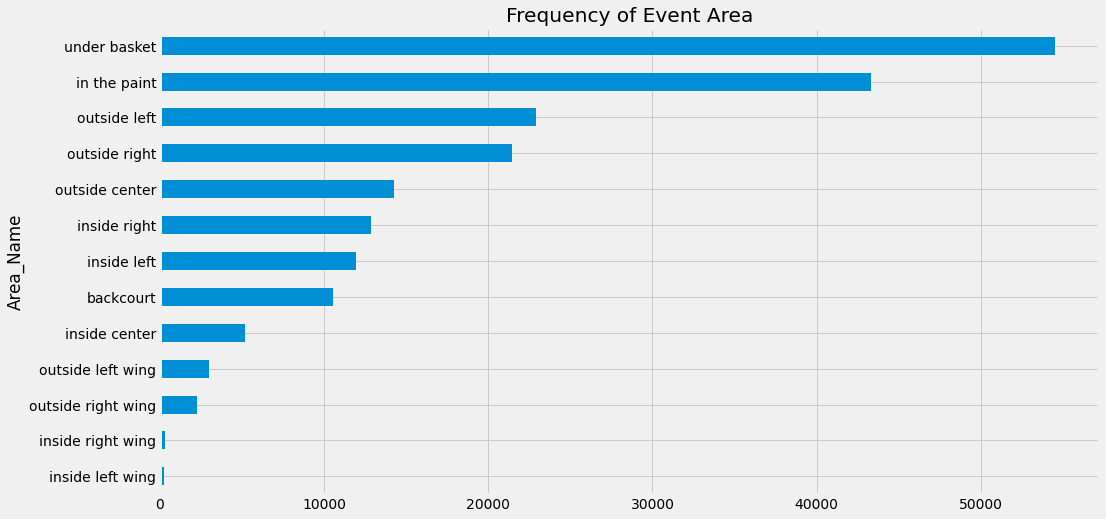

In [ ]:
MEvents.groupby('Area_Name')['counter'].sum() \
    .sort_values() \
    .plot(kind='barh',
          figsize=(15, 8),
          title='Frequency of Event Area')
plt.show()

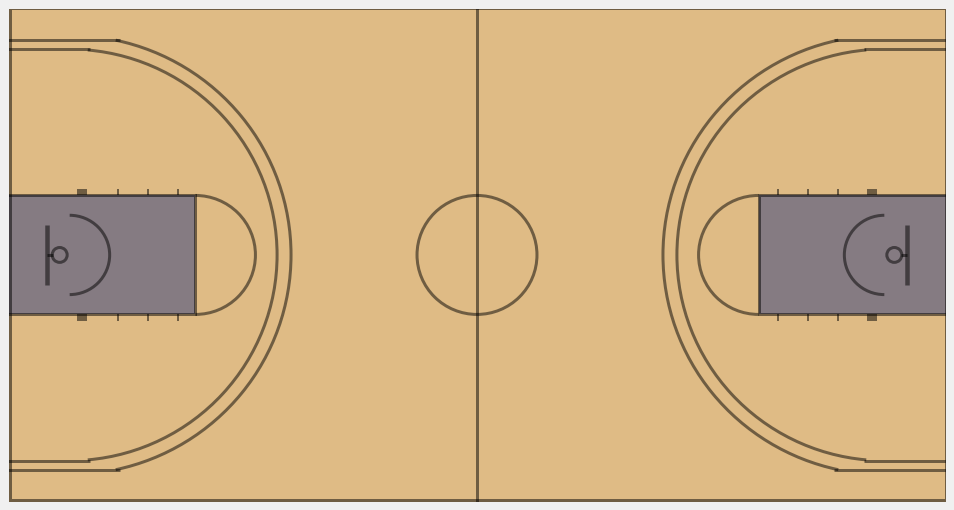

In [ ]:
def create_ncaa_full_court(ax=None, three_line='mens', court_color='#dfbb85',
                           lw=3, lines_color='black', lines_alpha=0.5,
                           paint_fill='blue', paint_alpha=0.4,
                           inner_arc=False):
    """
    Version 2020.2.19
    Creates NCAA Basketball Court
    Dimensions are in feet (Court is 97x50 ft)
    Created by: Rob Mulla / https://github.com/RobMulla

    * Note that this function uses "feet" as the unit of measure.
    * NCAA Data is provided on a x range: 0, 100 and y-range 0 to 100
    * To plot X/Y positions first convert to feet like this:
    ```
    Events['X_'] = (Events['X'] * (94/100))
    Events['Y_'] = (Events['Y'] * (50/100))
    ```
    
    ax: matplotlib axes if None gets current axes using `plt.gca`


    three_line: 'mens', 'womens' or 'both' defines 3 point line plotted
    court_color : (hex) Color of the court
    lw : line width
    lines_color : Color of the lines
    lines_alpha : transparency of lines
    paint_fill : Color inside the paint
    paint_alpha : transparency of the "paint"
    inner_arc : paint the dotted inner arc
    """
    if ax is None:
        ax = plt.gca()

    # Create Pathes for Court Lines
    center_circle = Circle((94/2, 50/2), 6,
                           linewidth=lw, color=lines_color, lw=lw,
                           fill=False, alpha=lines_alpha)
    hoop_left = Circle((5.25, 50/2), 1.5 / 2,
                       linewidth=lw, color=lines_color, lw=lw,
                       fill=False, alpha=lines_alpha)
    hoop_right = Circle((94-5.25, 50/2), 1.5 / 2,
                        linewidth=lw, color=lines_color, lw=lw,
                        fill=False, alpha=lines_alpha)

    # Paint - 18 Feet 10 inches which converts to 18.833333 feet - gross!
    left_paint = Rectangle((0, (50/2)-6), 18.833333, 12,
                           fill=paint_fill, alpha=paint_alpha,
                           lw=lw, edgecolor=None)
    right_paint = Rectangle((94-18.83333, (50/2)-6), 18.833333,
                            12, fill=paint_fill, alpha=paint_alpha,
                            lw=lw, edgecolor=None)
    
    left_paint_boarder = Rectangle((0, (50/2)-6), 18.833333, 12,
                           fill=False, alpha=lines_alpha,
                           lw=lw, edgecolor=lines_color)
    right_paint_boarder = Rectangle((94-18.83333, (50/2)-6), 18.833333,
                            12, fill=False, alpha=lines_alpha,
                            lw=lw, edgecolor=lines_color)

    left_arc = Arc((18.833333, 50/2), 12, 12, theta1=-
                   90, theta2=90, color=lines_color, lw=lw,
                   alpha=lines_alpha)
    right_arc = Arc((94-18.833333, 50/2), 12, 12, theta1=90,
                    theta2=-90, color=lines_color, lw=lw,
                    alpha=lines_alpha)
    
    leftblock1 = Rectangle((7, (50/2)-6-0.666), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    leftblock2 = Rectangle((7, (50/2)+6), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(leftblock1)
    ax.add_patch(leftblock2)
    
    left_l1 = Rectangle((11, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l2 = Rectangle((14, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l3 = Rectangle((17, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(left_l1)
    ax.add_patch(left_l2)
    ax.add_patch(left_l3)
    left_l4 = Rectangle((11, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l5 = Rectangle((14, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    left_l6 = Rectangle((17, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(left_l4)
    ax.add_patch(left_l5)
    ax.add_patch(left_l6)
    
    rightblock1 = Rectangle((94-7-1, (50/2)-6-0.666), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    rightblock2 = Rectangle((94-7-1, (50/2)+6), 1, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(rightblock1)
    ax.add_patch(rightblock2)

    right_l1 = Rectangle((94-11, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l2 = Rectangle((94-14, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l3 = Rectangle((94-17, (50/2)-6-0.666), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(right_l1)
    ax.add_patch(right_l2)
    ax.add_patch(right_l3)
    right_l4 = Rectangle((94-11, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l5 = Rectangle((94-14, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    right_l6 = Rectangle((94-17, (50/2)+6), 0.166, 0.666,
                           fill=True, alpha=lines_alpha,
                           lw=0, edgecolor=lines_color,
                           facecolor=lines_color)
    ax.add_patch(right_l4)
    ax.add_patch(right_l5)
    ax.add_patch(right_l6)
    
    # 3 Point Line
    if (three_line == 'mens') | (three_line == 'both'):
        # 22' 1.75" distance to center of hoop
        three_pt_left = Arc((6.25, 50/2), 44.291, 44.291, theta1=-78,
                            theta2=78, color=lines_color, lw=lw,
                            alpha=lines_alpha)
        three_pt_right = Arc((94-6.25, 50/2), 44.291, 44.291,
                             theta1=180-78, theta2=180+78,
                             color=lines_color, lw=lw, alpha=lines_alpha)

        # 4.25 feet max to sideline for mens
        ax.plot((0, 11.25), (3.34, 3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((0, 11.25), (50-3.34, 50-3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-11.25, 94), (3.34, 3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-11.25, 94), (50-3.34, 50-3.34),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.add_patch(three_pt_left)
        ax.add_patch(three_pt_right)

    if (three_line == 'womens') | (three_line == 'both'):
        # womens 3
        three_pt_left_w = Arc((6.25, 50/2), 20.75 * 2, 20.75 * 2, theta1=-85,
                              theta2=85, color=lines_color, lw=lw, alpha=lines_alpha)
        three_pt_right_w = Arc((94-6.25, 50/2), 20.75 * 2, 20.75 * 2,
                               theta1=180-85, theta2=180+85,
                               color=lines_color, lw=lw, alpha=lines_alpha)

        # 4.25 inches max to sideline for mens
        ax.plot((0, 8.3), (4.25, 4.25), color=lines_color,
                lw=lw, alpha=lines_alpha)
        ax.plot((0, 8.3), (50-4.25, 50-4.25),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-8.3, 94), (4.25, 4.25),
                color=lines_color, lw=lw, alpha=lines_alpha)
        ax.plot((94-8.3, 94), (50-4.25, 50-4.25),
                color=lines_color, lw=lw, alpha=lines_alpha)

        ax.add_patch(three_pt_left_w)
        ax.add_patch(three_pt_right_w)

    # Add Patches
    ax.add_patch(left_paint)
    ax.add_patch(left_paint_boarder)
    ax.add_patch(right_paint)
    ax.add_patch(right_paint_boarder)
    ax.add_patch(center_circle)
    ax.add_patch(hoop_left)
    ax.add_patch(hoop_right)
    ax.add_patch(left_arc)
    ax.add_patch(right_arc)
    
    if inner_arc:
        left_inner_arc = Arc((18.833333, 50/2), 12, 12, theta1=90,
                             theta2=-90, color=lines_color, lw=lw,
                       alpha=lines_alpha, ls='--')
        right_inner_arc = Arc((94-18.833333, 50/2), 12, 12, theta1=-90,
                        theta2=90, color=lines_color, lw=lw,
                        alpha=lines_alpha, ls='--')
        ax.add_patch(left_inner_arc)
        ax.add_patch(right_inner_arc)

    # Restricted Area Marker
    restricted_left = Arc((6.25, 50/2), 8, 8, theta1=-90,
                        theta2=90, color=lines_color, lw=lw,
                        alpha=lines_alpha)
    restricted_right = Arc((94-6.25, 50/2), 8, 8,
                         theta1=180-90, theta2=180+90,
                         color=lines_color, lw=lw, alpha=lines_alpha)
    ax.add_patch(restricted_left)
    ax.add_patch(restricted_right)
    
    # Backboards
    ax.plot((4, 4), ((50/2) - 3, (50/2) + 3),
            color=lines_color, lw=lw*1.5, alpha=lines_alpha)
    ax.plot((94-4, 94-4), ((50/2) - 3, (50/2) + 3),
            color=lines_color, lw=lw*1.5, alpha=lines_alpha)
    ax.plot((4, 4.6), (50/2, 50/2), color=lines_color,
            lw=lw, alpha=lines_alpha)
    ax.plot((94-4, 94-4.6), (50/2, 50/2),
            color=lines_color, lw=lw, alpha=lines_alpha)

    # Half Court Line
    ax.axvline(94/2, color=lines_color, lw=lw, alpha=lines_alpha)

    # Boarder
    boarder = Rectangle((0.3,0.3), 94-0.4, 50-0.4, fill=False, lw=3, color='black', alpha=lines_alpha)
    ax.add_patch(boarder)
    
    # Plot Limit
    ax.set_xlim(0, 94)
    ax.set_ylim(0, 50)
    ax.set_facecolor(court_color)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    return ax


fig, ax = plt.subplots(figsize=(15, 8.5))
create_ncaa_full_court(ax, three_line='both', paint_alpha=0.4)
plt.show()



In [ ]:
MEvents['X_'] = (MEvents['X'] * (94/100))
MEvents['Y_'] = (MEvents['Y'] * (50/100))

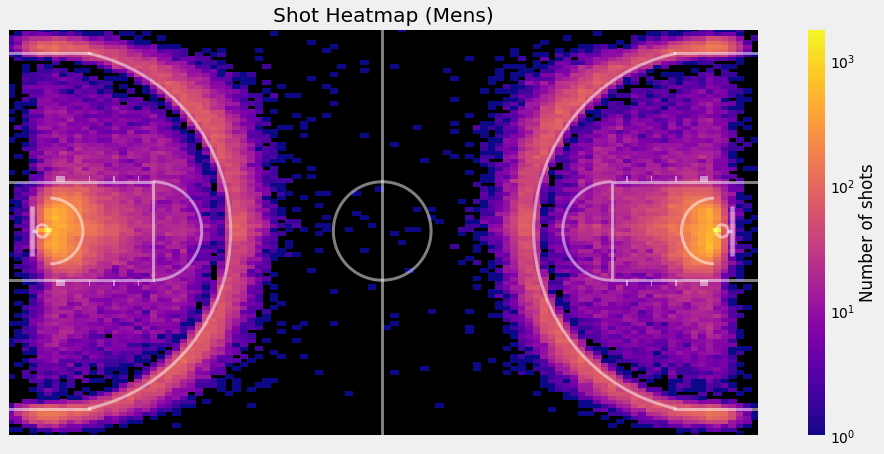

In [ ]:
N_bins = 100
shot_events = MEvents.loc[MEvents['EventType'].isin(['miss3','made3','miss2','made2']) & (MEvents['X_'] != 0)]
fig, ax = plt.subplots(figsize=(15, 7))
ax = create_ncaa_full_court(ax,
                            paint_alpha=0.0,
                            three_line='mens',
                            court_color='black',
                            lines_color='white')
_ = plt.hist2d(shot_events['X_'].values + np.random.normal(0, 0.1, shot_events['X_'].shape), # Add Jitter to values for plotting
           shot_events['Y_'].values + np.random.normal(0, 0.1, shot_events['Y_'].shape),
           bins=N_bins, norm=mpl.colors.LogNorm(),
               cmap='plasma')

# Plot a colorbar with label.
cb = plt.colorbar()
cb.set_label('Number of shots')

ax.set_title('Shot Heatmap (Mens)')
plt.show()


In [ ]:
t_seeds = pd.merge(t_seeds, teams,on='TeamID')
t_seeds.head()

,Season,Seed,TeamID,TeamName,FirstD1Season,LastD1Season
0,1985,W01,1207,Georgetown,1985,2021
1,1986,X04,1207,Georgetown,1985,2021
2,1987,X01,1207,Georgetown,1985,2021
3,1988,W08,1207,Georgetown,1985,2021
4,1989,W01,1207,Georgetown,1985,2021


In [ ]:

t_seeds['Region'] = t_seeds['Seed'].apply(lambda x: x[0][:1])
t_seeds['Seed'] = t_seeds['Seed'].apply(lambda x: int(x[1:3]))
print(t_seeds.head())
print(t_seeds.shape)

   Season  Seed  TeamID    TeamName  FirstD1Season  LastD1Season Region
0    1985     1    1207  Georgetown           1985          2021      W
1    1986     4    1207  Georgetown           1985          2021      X
2    1987     1    1207  Georgetown           1985          2021      X
3    1988     8    1207  Georgetown           1985          2021      W
4    1989     1    1207  Georgetown           1985          2021      W
(2354, 7)


Text(0.5, 0, 'Number of times in Top seeded positions')

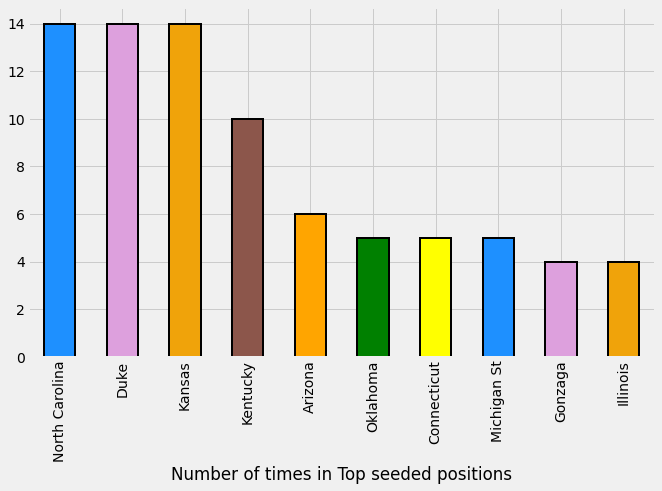

In [ ]:
# Teams with maximum top seeds
fig = plt.gcf()
fig.set_size_inches(10, 6)
colors = ['dodgerblue', 'plum', '#F0A30A','#8c564b','orange','green','yellow'] 

t_seeds[t_seeds['Seed'] ==1]['TeamName'].value_counts()[:10].plot(kind='bar',color=colors,linewidth=2,edgecolor='black')
plt.xlabel('Number of times in Top seeded positions')

**Data Manipulation**

In [ ]:
########################
## Season Stats
########################
# Adding Conference columns to win and losing teams to detail data to calculate PW5 win percentage
conferences['Sn_Tm'] = conferences['Season'].astype(str) + conferences['TeamID'].astype(str)

# Create Dateframe only containing Sn_Tm and Conference
conf= conferences[['Sn_Tm','ConfAbbrev']]
r_results_d.columns

#Create two data frame, one for the winner team ids, and one for the loser teamids
resultsW = pd.DataFrame(r_results_d[['Season','WTeamID']])
resultsL = pd.DataFrame(r_results_d[['Season','LTeamID']])

#Add Sn_Tm to both dataframes
resultsW['Sn_Tm'] = resultsW['Season'].astype(str) + resultsW['WTeamID'].astype(str)
resultsL['Sn_Tm'] = resultsL['Season'].astype(str) + resultsL['LTeamID'].astype(str)

resultsW=resultsW.merge(conf, on='Sn_Tm', how='left', indicator=False)
resultsL=resultsL.merge(conf, on='Sn_Tm', how='left', indicator=False)

r_results_d['WTeamConf']= resultsW['ConfAbbrev']
r_results_d['LTeamConf']= resultsL['ConfAbbrev']

#Identify if game was a Power 5 win or loss
r_results_d.loc[(r_results_d['WTeamConf'] == 'sec') | (r_results_d['WTeamConf'] == 'acc')| (r_results_d['WTeamConf'] == 'big_twelve')| (r_results_d['WTeamConf'] == 'pac_twelve')| (r_results_d['WTeamConf'] == 'big_ten') , 'PW5_L'] = 1
r_results_d.loc[(r_results_d['LTeamConf'] == 'sec') | (r_results_d['LTeamConf'] == 'acc')| (r_results_d['LTeamConf'] == 'big_twelve')| (r_results_d['LTeamConf'] == 'pac_twelve')| (r_results_d['LTeamConf'] == 'big_ten') , 'PW5_W'] = 1

#Replace NaN with 0
r_results_d['PW5_L'] = r_results_d['PW5_L'].fillna(0)
r_results_d['PW5_W'] = r_results_d['PW5_W'].fillna(0)

r_results_d

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WTeamConf,LTeamConf,PW5_L,PW5_W
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,sec,big_twelve,1.0,1.0
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,cusa,big_east,0.0,0.0
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,cusa,big_east,0.0,0.0
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,mac,big_south,0.0,0.0
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,big_twelve,sec,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92827,2020,128,1389,56,1233,54,N,0,15,60,5,24,21,26,19,26,4,14,6,5,23,17,46,2,16,18,20,4,27,6,17,8,4,20,maac,maac,0.0,0.0
92828,2020,128,1393,81,1314,53,N,0,28,61,7,21,18,28,10,29,15,8,11,3,17,20,60,2,16,11,13,13,29,9,18,0,1,18,acc,acc,1.0,1.0
92829,2020,128,1402,85,1111,68,H,0,34,57,4,12,13,16,6,25,20,14,9,0,24,20,46,3,15,25,35,8,17,6,18,7,2,18,sun_belt,sun_belt,0.0,0.0
92830,2020,128,1412,74,1427,69,N,0,26,53,8,14,14,20,8,29,12,16,6,5,16,26,67,10,27,7,7,12,22,11,13,4,2,18,cusa,cusa,0.0,0.0


In [ ]:
# Separate winner and losers data and then append into one dataframe
#Selects columns relevant to winners
winners=r_results_d[['Season', 'WTeamID', 'WScore', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR','WAst', 'WTO', 'WStl', 'WBlk', 'WPF','PW5_W', 'PW5_L']]

#Selects columns relevant to losers
losers= r_results_d[['Season', 'LTeamID', 'LScore', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR','LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'PW5_W','PW5_L']]

# Add winners and losers
winners["W"]=1
winners["L"]=0
losers["W"]=0
losers["L"]=1

# Rename column names to append the data
winners.columns= ('Season', 'TeamID', 'Score', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR','Ast', 'TO', 'Stl', 'Blk', 'PF','PW5_W','PW5_L','W','L')
losers.columns=('Season', 'TeamID', 'Score', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA', 'OR', 'DR','Ast', 'TO', 'Stl', 'Blk', 'PF','PW5_W','PW5_L','W','L')
print(winners.info)
print(losers.info)

# Append losers data to the bottom of winners
season_detail=winners.append(losers)

season_detail['PW5_W']=season_detail['PW5_W']*season_detail['W']
season_detail['PW5_L']=season_detail['PW5_L']*season_detail['L']
season_detail

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

<bound method DataFrame.info of        Season  TeamID  Score  FGM  FGA  FGM3  ...  Blk  PF  PW5_W  PW5_L  W  L
0        2003    1104     68   27   58     3  ...    1  22    1.0    1.0  1  0
1        2003    1272     70   26   62     8  ...    4  18    0.0    0.0  1  0
2        2003    1266     73   24   58     8  ...    2  25    0.0    0.0  1  0
3        2003    1296     56   18   38     3  ...    2  18    0.0    0.0  1  0
4        2003    1400     77   30   61     6  ...    4  20    1.0    1.0  1  0
...       ...     ...    ...  ...  ...   ...  ...  ...  ..    ...    ... .. ..
92827    2020    1389     56   15   60     5  ...    5  23    0.0    0.0  1  0
92828    2020    1393     81   28   61     7  ...    3  17    1.0    1.0  1  0
92829    2020    1402     85   34   57     4  ...    0  24    0.0    0.0  1  0
92830    2020    1412     74   26   53     8  ...    5  16    0.0    0.0  1  0
92831    2020    1450     82   27   55    10  ...    3  24    1.0    1.0  1  0

[92832 rows x 20 co

,Season,TeamID,Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,PW5_W,PW5_L,W,L
0,2003,1104,68,27,58,3,14,11,18,14,24,13,23,7,1,22,1.0,0.0,1,0
1,2003,1272,70,26,62,8,20,10,19,15,28,16,13,4,4,18,0.0,0.0,1,0
2,2003,1266,73,24,58,8,18,17,29,17,26,15,10,5,2,25,0.0,0.0,1,0
3,2003,1296,56,18,38,3,9,17,31,6,19,11,12,14,2,18,0.0,0.0,1,0
4,2003,1400,77,30,61,6,14,11,13,17,22,12,14,4,4,20,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92827,2020,1233,54,17,46,2,16,18,20,4,27,6,17,8,4,20,0.0,0.0,0,1
92828,2020,1314,53,20,60,2,16,11,13,13,29,9,18,0,1,18,0.0,1.0,0,1
92829,2020,1111,68,20,46,3,15,25,35,8,17,6,18,7,2,18,0.0,0.0,0,1
92830,2020,1427,69,26,67,10,27,7,7,12,22,11,13,4,2,18,0.0,0.0,0,1


In [ ]:
#summarize season detail data by season and teamid 
#Create new column by concatenating season and teamid to properly aggregate
season_detail['Sn_Tm'] = season_detail['Season'].astype(str) + season_detail['TeamID'].astype(str)

#Aggregate data by Sn_Tm. Results are the season performance for all teams
#season_detail_summ=pd.DataFrame(season_detail.groupby(['Sn_Tm','TeamID','Season']).sum())
season_detail_summ=pd.DataFrame(season_detail.groupby(['Sn_Tm']).sum())

#Add Total Games
season_detail_summ['Games'] = season_detail_summ['W'] + season_detail_summ['L']

#Add PW5 Total Games
season_detail_summ['PW5_Games'] = season_detail_summ['PW5_W'] + season_detail_summ['PW5_L']

# Fix season Id
season_detail_summ['Season'] = season_detail_summ['Season'] / season_detail_summ['Games']
season_detail_summ['Season'] = season_detail_summ['Season'].astype(int)
season_detail_summ['Season'] = season_detail_summ['Season'].astype(str)

# Fix Team Id
season_detail_summ['TeamID'] = season_detail_summ['TeamID'] / season_detail_summ['Games']
season_detail_summ['TeamID']=season_detail_summ['TeamID'].astype(int)
season_detail_summ['Season'] = season_detail_summ['Season'].astype(str)

#Calculate win percentage
season_detail_summ['Win_per'] = season_detail_summ['W'] / season_detail_summ['Games']

#Calculate win percentage in Power 5 Games
season_detail_summ['Win_PW5_per'] = season_detail_summ['PW5_W'] / season_detail_summ['Games']

#Calculate Field Goal Percentage
season_detail_summ['FG_Perc'] = season_detail_summ['FGM'] / season_detail_summ['FGA']

#Calculate 3 Point Field Goal Percentage
season_detail_summ['FG3_Perc'] = season_detail_summ['FGM3'] / season_detail_summ['FGA3']

#Calculate Free Throw Percentage
season_detail_summ['FT_Perc'] = season_detail_summ['FTM'] / season_detail_summ['FTA']

#Calculate points fouls per game
season_detail_summ['Score_Per_Gm'] = season_detail_summ['Score'] / season_detail_summ['Games']

#Calculate Offensive rebounds per game
season_detail_summ['OR_Per_Gm'] = season_detail_summ['OR'] / season_detail_summ['Games']

#Calculate Defensive rebounds per game
season_detail_summ['DR_Per_Gm'] = season_detail_summ['DR'] / season_detail_summ['Games']

#Calculate assists per game
season_detail_summ['Ast_Per_Gm'] = season_detail_summ['Ast'] / season_detail_summ['Games']

#Calculate turnover per game
season_detail_summ['TO_Per_Gm'] = season_detail_summ['TO'] / season_detail_summ['Games']

#Calculate steal per game
season_detail_summ['Stl_Per_Gm'] = season_detail_summ['Stl'] / season_detail_summ['Games']

#Calculate blocks per game
season_detail_summ['Blk_Per_Gm'] = season_detail_summ['Blk'] / season_detail_summ['Games']

#Calculate personal fouls per game
season_detail_summ['PF_Per_Gm'] = season_detail_summ['PF'] / season_detail_summ['Games']



# Keep percentage columns
season_detail_summ=season_detail_summ[['Season', 'TeamID', 'Win_per', 'Win_PW5_per', 'FG_Perc', 'FG3_Perc',
       'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm', 'DR_Per_Gm', 'Ast_Per_Gm',
       'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm', 'PF_Per_Gm']]
eda_data=season_detail_summ
season_detail_summ

,Season,TeamID,Win_per,Win_PW5_per,FG_Perc,FG3_Perc,FT_Perc,Score_Per_Gm,OR_Per_Gm,DR_Per_Gm,Ast_Per_Gm,TO_Per_Gm,Stl_Per_Gm,Blk_Per_Gm,PF_Per_Gm
Sn_Tm,,,,,,,,,,,,,,,
20031102,2003,1102,0.428571,0.000000,0.481149,0.375643,0.651357,57.250000,4.178571,16.821429,13.000000,11.428571,5.964286,1.785714,18.750000
20031103,2003,1103,0.481481,0.000000,0.486074,0.338710,0.736390,78.777778,9.777778,19.925926,15.222222,12.629630,7.259259,2.333333,19.851852
20031104,2003,1104,0.607143,0.321429,0.420362,0.320144,0.709898,69.285714,13.571429,23.928571,12.107143,13.285714,6.607143,3.785714,18.035714
20031105,2003,1105,0.269231,0.000000,0.395755,0.364815,0.705986,71.769231,13.500000,23.115385,14.538462,18.653846,9.307692,2.076923,20.230769
20031106,2003,1106,0.464286,0.000000,0.423773,0.346154,0.646421,63.607143,12.285714,23.857143,11.678571,17.035714,8.357143,3.142857,18.178571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20201463,2020,1463,0.750000,0.035714,0.460723,0.369436,0.718563,74.535714,8.607143,29.357143,14.857143,13.000000,6.214286,3.285714,15.035714
20201464,2020,1464,0.516129,0.000000,0.415618,0.311888,0.695804,71.193548,13.709677,25.032258,11.967742,12.225806,5.322581,2.516129,17.806452
20201465,2020,1465,0.629630,0.000000,0.429290,0.377074,0.787879,76.222222,11.037037,28.481481,12.777778,12.518519,3.592593,3.518519,18.296296


In [ ]:
# Filter tourney winner
t_resultsw=t_results_d[['Season','WTeamID']]
t_resultsw.columns=('Season','TeamID')
t_resultsw['Sn_Tm'] = t_resultsw['Season'].astype(str) + t_resultsw['TeamID'].astype(str)

#Filter tourney losers
t_resultsl=t_results_d[['Season','LTeamID']]
t_resultsl.columns=('Season','TeamID')
t_resultsl['Sn_Tm'] = t_resultsl['Season'].astype(str) + t_resultsl['TeamID'].astype(str)

#season_detail_summ remove team and season from season summary
season_detail_summ=season_detail_summ[['Win_per', 'Win_PW5_per', 'FG_Perc', 'FG3_Perc',
       'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm', 'DR_Per_Gm', 'Ast_Per_Gm',
       'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm', 'PF_Per_Gm']]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
# Add season results to tournament results
t_resultsw=t_resultsw.merge(season_detail_summ, on='Sn_Tm', how='left', indicator=False)
t_resultsl=t_resultsl.merge(season_detail_summ, on='Sn_Tm', how='left', indicator=False)


In [ ]:
# Calculate the margin between th winners and losers and vice versa
t_results_marginw = t_resultsw[['Season','TeamID']]
t_results_marginw[['W']]=1
t_results_marginw['Win_per_diff'] = t_resultsw ['Win_per'] - t_resultsl ['Win_per']
t_results_marginw['Win_PW5_per_diff'] = t_resultsw ['Win_PW5_per'] - t_resultsl ['Win_PW5_per']
t_results_marginw['FG_Perc_diff'] = t_resultsw ['FG_Perc'] - t_resultsl ['FG_Perc']
t_results_marginw['FG3_Perc_diff'] = t_resultsw ['FG3_Perc'] - t_resultsl ['FG3_Perc']
t_results_marginw['FT_Perc_diff'] = t_resultsw ['FT_Perc'] - t_resultsl ['FT_Perc']
t_results_marginw['Score_Per_Gm_diff'] = t_resultsw ['Score_Per_Gm'] - t_resultsl ['Score_Per_Gm']
t_results_marginw['OR_Per_Gm_diff'] = t_resultsw ['OR_Per_Gm'] - t_resultsl ['OR_Per_Gm']
t_results_marginw['DR_Per_Gm_diff'] = t_resultsw ['DR_Per_Gm'] - t_resultsl ['DR_Per_Gm']
t_results_marginw['Ast_Per_Gm_diff'] = t_resultsw ['Ast_Per_Gm'] - t_resultsl ['Ast_Per_Gm']
t_results_marginw['TO_Per_Gm_diff'] = t_resultsw ['TO_Per_Gm'] - t_resultsl ['TO_Per_Gm']
t_results_marginw['Stl_Per_Gm_diff'] = t_resultsw ['Stl_Per_Gm'] - t_resultsl ['Stl_Per_Gm']
t_results_marginw['Blk_Per_Gm_diff'] = t_resultsw ['Blk_Per_Gm'] - t_resultsl ['Blk_Per_Gm']
t_results_marginw['PF_Per_Gm_diff'] = t_resultsw ['PF_Per_Gm'] - t_resultsl ['PF_Per_Gm']
t_results_marginw

t_results_marginl = t_resultsl[['Season','TeamID']]
t_results_marginl[['W']]=0
t_results_marginl['Win_per_diff'] = -t_resultsw ['Win_per'] + t_resultsl ['Win_per']
t_results_marginl['Win_PW5_per_diff'] = -t_resultsw ['Win_PW5_per'] + t_resultsl ['Win_PW5_per']
t_results_marginl['FG_Perc_diff'] = -t_resultsw ['FG_Perc'] + t_resultsl ['FG_Perc']
t_results_marginl['FG3_Perc_diff'] = -t_resultsw ['FG3_Perc'] + t_resultsl ['FG3_Perc']
t_results_marginl['FT_Perc_diff'] = -t_resultsw ['FT_Perc'] + t_resultsl ['FT_Perc']
t_results_marginl['Score_Per_Gm_diff'] = -t_resultsw ['Score_Per_Gm'] + t_resultsl ['Score_Per_Gm']
t_results_marginl['OR_Per_Gm_diff'] = -t_resultsw ['OR_Per_Gm'] + t_resultsl ['OR_Per_Gm']
t_results_marginl['DR_Per_Gm_diff'] = -t_resultsw ['DR_Per_Gm'] + t_resultsl ['DR_Per_Gm']
t_results_marginl['Ast_Per_Gm_diff'] = -t_resultsw ['Ast_Per_Gm'] + t_resultsl ['Ast_Per_Gm']
t_results_marginl['TO_Per_Gm_diff'] = -t_resultsw ['TO_Per_Gm'] + t_resultsl ['TO_Per_Gm']
t_results_marginl['Stl_Per_Gm_diff'] = -t_resultsw ['Stl_Per_Gm'] + t_resultsl ['Stl_Per_Gm']
t_results_marginl['Blk_Per_Gm_diff'] = -t_resultsw ['Blk_Per_Gm'] + t_resultsl ['Blk_Per_Gm']
t_results_marginl['PF_Per_Gm_diff'] = -t_resultsw ['PF_Per_Gm'] + t_resultsl ['PF_Per_Gm']

t_results_margin=t_results_marginw.append(t_results_marginl)

t_results_margin

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

,Season,TeamID,W,Win_per_diff,Win_PW5_per_diff,FG_Perc_diff,FG3_Perc_diff,FT_Perc_diff,Score_Per_Gm_diff,OR_Per_Gm_diff,DR_Per_Gm_diff,Ast_Per_Gm_diff,TO_Per_Gm_diff,Stl_Per_Gm_diff,Blk_Per_Gm_diff,PF_Per_Gm_diff
0,2003,1421,1,-0.151724,0.000000,-0.018262,0.039433,0.142815,-1.593103,-0.890805,-1.627586,-1.165517,0.973563,0.635632,0.766667,0.803448
1,2003,1112,1,0.237685,0.071429,0.016969,0.009777,0.043580,17.421182,2.213054,1.918719,3.435961,0.716749,1.602217,1.248768,1.853448
2,2003,1113,1,-0.172414,-0.034483,0.040251,-0.030989,0.016122,1.448276,-0.379310,-2.655172,-1.068966,0.206897,-2.172414,-0.827586,0.655172
3,2003,1141,1,-0.085684,0.004180,0.005763,-0.008284,0.072864,0.102403,-0.292581,0.094044,-1.197492,4.877743,-1.290491,-0.454545,3.692790
4,2003,1143,1,0.124138,-0.433333,0.009399,0.022444,-0.084846,2.082759,1.508046,2.345977,1.333333,-0.027586,-1.214943,-0.273563,-1.563218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2019,1246,0,0.082888,0.106061,0.031272,-0.016963,0.023888,-2.155080,-0.129234,4.877005,-0.563280,0.489305,-3.263815,0.295900,-2.079323
1111,2019,1181,0,0.029412,-0.029412,-0.008376,-0.081717,-0.060253,4.676471,2.558824,-1.705882,-3.029412,0.264706,4.235294,1.352941,-1.058824
1112,2019,1277,0,0.011029,0.115809,0.014047,0.016003,0.022269,5.729779,1.979779,4.650735,4.909926,0.477941,-2.139706,0.564338,-0.869485
1113,2019,1120,0,-0.170956,-0.125000,-0.030932,-0.027983,-0.030298,7.038603,2.860294,-3.808824,-0.088235,3.115809,3.669118,0.952206,3.726103


Converts Binary

In [ ]:
#Convert to Binary

#t_results_margin[['Win_per_diff']]=t_results_margin[['Win_per_diff']]>0
#t_results_margin[['Win_PW5_per_diff']]=t_results_margin[['Win_PW5_per_diff']]>0
#t_results_margin[['FG_Perc_diff']]=t_results_margin[['FG_Perc_diff']]>0
#t_results_margin[['FG3_Perc_diff']]=t_results_margin[['FG3_Perc_diff']]>0
#t_results_margin[['FT_Perc_diff']]=t_results_margin[['FT_Perc_diff']]>0
#t_results_margin[['Score_Per_Gm_diff']]=t_results_margin[['Score_Per_Gm_diff']]>0
#t_results_margin[['OR_Per_Gm_diff']]=t_results_margin[['OR_Per_Gm_diff']]>0
#t_results_margin[['DR_Per_Gm_diff']]=t_results_margin[['DR_Per_Gm_diff']]>0
#t_results_margin[['Ast_Per_Gm_diff']]=t_results_margin[['Ast_Per_Gm_diff']]>0
#t_results_margin[['TO_Per_Gm_diff']]=t_results_margin[['TO_Per_Gm_diff']]>0
#t_results_margin[['Stl_Per_Gm_diff']]=t_results_margin[['Stl_Per_Gm_diff']] >0 
#t_results_margin[['Blk_Per_Gm_diff']]=t_results_margin[['Blk_Per_Gm_diff']] >0 
#t_results_margin[['PF_Per_Gm_diff']]=t_results_margin[['PF_Per_Gm_diff']]>0

#Add Conference to binary data
#conferences['Sn_Tm'] = conferences['Season'].astype(str) + conferences['TeamID'].astype(str)
#conf= conferences[['Sn_Tm','ConfAbbrev']]
#t_results_margin['Sn_Tm'] = t_results_margin['Season'].astype(str) + t_results_margin['TeamID'].astype(str)
#t_results_margin=t_results_margin.merge(conf, on='Sn_Tm', how='left', indicator=False)



**Modeling**

In [ ]:
# Creating Training data: Use 2003 - 2018
train_tourney = t_results_margin[t_results_margin['Season']<2019]

# Creating Test data: Use 2019
test_tourney = t_results_margin[t_results_margin['Season']==2019]

# Columns relevent for training nd testing model
model_columns=['W', 'Win_per_diff', 'Win_PW5_per_diff',
       'FG_Perc_diff', 'FG3_Perc_diff', 'FT_Perc_diff', 'Score_Per_Gm_diff',
       'OR_Per_Gm_diff', 'DR_Per_Gm_diff', 'Ast_Per_Gm_diff', 'TO_Per_Gm_diff',
       'Stl_Per_Gm_diff', 'Blk_Per_Gm_diff', 'PF_Per_Gm_diff']

#model_columns=['W', 'Win_per_diff', 'Win_PW5_per_diff',
#       'FG_Perc_diff', 'FG3_Perc_diff', 'FT_Perc_diff', 'Score_Per_Gm_diff',
#       'OR_Per_Gm_diff', 'DR_Per_Gm_diff', 'Ast_Per_Gm_diff', 'TO_Per_Gm_diff',
#       'Stl_Per_Gm_diff', 'Blk_Per_Gm_diff', 'PF_Per_Gm_diff', 
#       'ConfAbbrev']

train_tourney=train_tourney[model_columns]
test_tourney=test_tourney[model_columns] 

#
x_train = train_tourney.drop("W", axis=1)
y_train = train_tourney["W"]
x_test = test_tourney.drop("W", axis=1)
y_test = test_tourney["W"]

In [ ]:
train_tourney

,W,Win_per_diff,Win_PW5_per_diff,FG_Perc_diff,FG3_Perc_diff,FT_Perc_diff,Score_Per_Gm_diff,OR_Per_Gm_diff,DR_Per_Gm_diff,Ast_Per_Gm_diff,TO_Per_Gm_diff,Stl_Per_Gm_diff,Blk_Per_Gm_diff,PF_Per_Gm_diff
0,1,-0.151724,0.000000,-0.018262,0.039433,0.142815,-1.593103,-0.890805,-1.627586,-1.165517,0.973563,0.635632,0.766667,0.803448
1,1,0.237685,0.071429,0.016969,0.009777,0.043580,17.421182,2.213054,1.918719,3.435961,0.716749,1.602217,1.248768,1.853448
2,1,-0.172414,-0.034483,0.040251,-0.030989,0.016122,1.448276,-0.379310,-2.655172,-1.068966,0.206897,-2.172414,-0.827586,0.655172
3,1,-0.085684,0.004180,0.005763,-0.008284,0.072864,0.102403,-0.292581,0.094044,-1.197492,4.877743,-1.290491,-0.454545,3.692790
4,1,0.124138,-0.433333,0.009399,0.022444,-0.084846,2.082759,1.508046,2.345977,1.333333,-0.027586,-1.214943,-0.273563,-1.563218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,0,-0.006239,-0.072193,-0.004420,-0.024636,0.008275,3.196970,3.986631,2.686275,0.515152,0.929590,0.897504,1.187166,0.342246
1044,0,-0.155080,0.425134,-0.040324,-0.032018,-0.070351,-11.816399,1.617647,-1.266488,-2.252228,2.192513,0.717469,0.302139,2.298574
1045,0,0.049632,-0.527574,0.040820,0.037245,0.067725,-1.959559,-2.490809,1.042279,0.849265,3.198529,0.479779,-0.713235,-1.705882
1046,0,-0.088235,0.588235,-0.006732,0.004618,-0.071285,-5.558824,0.176471,-0.558824,0.323529,1.323529,-0.058824,0.205882,-0.558824


In [ ]:
test_tourney

,W,Win_per_diff,Win_PW5_per_diff,FG_Perc_diff,FG3_Perc_diff,FT_Perc_diff,Score_Per_Gm_diff,OR_Per_Gm_diff,DR_Per_Gm_diff,Ast_Per_Gm_diff,TO_Per_Gm_diff,Stl_Per_Gm_diff,Blk_Per_Gm_diff,PF_Per_Gm_diff
1048,1,0.114583,-0.060417,0.058356,0.040101,0.004436,12.022917,-0.818750,5.104167,5.131250,0.443750,-1.989583,1.550000,-1.768750
1049,1,-0.055718,0.000000,0.038932,0.089677,0.062726,-0.106549,-1.986315,1.127077,1.632454,0.845552,-1.302053,2.039101,-4.955034
1050,1,0.051136,0.409091,-0.006775,-0.020006,-0.054606,0.297348,4.519886,2.903409,-0.436553,3.230114,-2.599432,-0.114583,0.845644
1051,1,0.016129,0.000000,0.007545,0.056647,0.061070,4.590323,-4.952688,-0.739785,-3.110753,-4.854839,-0.524731,-0.082796,-2.904301
1052,1,-0.139706,0.437500,-0.014053,0.040243,0.042481,1.226103,-0.889706,-3.183824,-0.088235,0.115809,3.762868,2.295956,0.288603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,0,0.082888,0.106061,0.031272,-0.016963,0.023888,-2.155080,-0.129234,4.877005,-0.563280,0.489305,-3.263815,0.295900,-2.079323
1111,0,0.029412,-0.029412,-0.008376,-0.081717,-0.060253,4.676471,2.558824,-1.705882,-3.029412,0.264706,4.235294,1.352941,-1.058824
1112,0,0.011029,0.115809,0.014047,0.016003,0.022269,5.729779,1.979779,4.650735,4.909926,0.477941,-2.139706,0.564338,-0.869485
1113,0,-0.170956,-0.125000,-0.030932,-0.027983,-0.030298,7.038603,2.860294,-3.808824,-0.088235,3.115809,3.669118,0.952206,3.726103


In [ ]:
########################
## Random Forest 1
########################
# Training the Model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

# Predict results
y_pred = random_forest.predict(x_test)

#Results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))
ranfor1_acc=accuracy_score(y_test, y_pred)

[[55 12]
 [17 50]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79        67
           1       0.81      0.75      0.78        67

    accuracy                           0.78       134
   macro avg       0.79      0.78      0.78       134
weighted avg       0.79      0.78      0.78       134

0.7835820895522388


In [ ]:
########################
## Random Forest 2
########################
# Training the Model
random_forest2 = RandomForestClassifier(n_estimators=300, max_features=0.4)
random_forest2.fit(x_train, y_train)

# Predict results
y_pred2 = random_forest2.predict(x_test)

#Results
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test, y_pred2))
ranfor2_acc=accuracy_score(y_test, y_pred2)

[[51 16]
 [20 47]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74        67
           1       0.75      0.70      0.72        67

    accuracy                           0.73       134
   macro avg       0.73      0.73      0.73       134
weighted avg       0.73      0.73      0.73       134

0.7313432835820896


In [ ]:
########################
## Logistic Regression
########################
# Training the Model
#logreg = LogisticRegression(class_weight='balanced')
#logreg = LogisticRegression(solver='newton-cg')
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

# Predict results
y_pred3 = logreg.predict(x_test)

#Results
print(confusion_matrix(y_test,y_pred3))
print(classification_report(y_test,y_pred3))
print(accuracy_score(y_test, y_pred3))
logreg_acc=accuracy_score(y_test, y_pred3)

[[50 17]
 [17 50]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        67
           1       0.75      0.75      0.75        67

    accuracy                           0.75       134
   macro avg       0.75      0.75      0.75       134
weighted avg       0.75      0.75      0.75       134

0.746268656716418


In [ ]:
########################
## K Nearest Neighbor
########################
# Training the Model
knn = KNeighborsClassifier(n_neighbors = 9) 
#knn = KNeighborsClassifier(n_neighbors = 9, weights='distance') 
knn.fit(x_train, y_train)  

# Predict results
y_pred4 = knn.predict(x_test)  
#acc_knn = round(knn.score(x_train, y_train) * 100, 2)

#Results
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
print(accuracy_score(y_test, y_pred4))
knn_acc=accuracy_score(y_test, y_pred4)

[[42 25]
 [25 42]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63        67
           1       0.63      0.63      0.63        67

    accuracy                           0.63       134
   macro avg       0.63      0.63      0.63       134
weighted avg       0.63      0.63      0.63       134

0.6268656716417911


In [ ]:
########################
## Gaussian Naive Bayes
########################
# Training the Model
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  

# Predict results
y_pred5 = gaussian.predict(x_test)  
#acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

#Results
print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test,y_pred5))
print(accuracy_score(y_test, y_pred5))
NaiveBay_acc=accuracy_score(y_test, y_pred5)

[[50 17]
 [17 50]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        67
           1       0.75      0.75      0.75        67

    accuracy                           0.75       134
   macro avg       0.75      0.75      0.75       134
weighted avg       0.75      0.75      0.75       134

0.746268656716418


In [ ]:
########################
## Perceptron
########################
# Training the Model
#perceptron = Perceptron(max_iter=5)
perceptron = Perceptron(max_iter=8)
#perceptron = Perceptron(max_iter=9,penalty='l1')
perceptron.fit(x_train, y_train) 

# Predict results
y_pred6 = perceptron.predict(x_test)
#acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

#Results
print(confusion_matrix(y_test,y_pred6))
print(classification_report(y_test,y_pred6))
print(accuracy_score(y_test, y_pred6))
Perceptron_acc=accuracy_score(y_test, y_pred6)

[[50 17]
 [18 49]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.74        67
           1       0.74      0.73      0.74        67

    accuracy                           0.74       134
   macro avg       0.74      0.74      0.74       134
weighted avg       0.74      0.74      0.74       134

0.7388059701492538


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Results

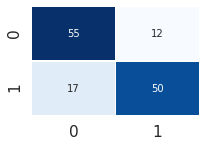

In [ ]:
#Plot 1
#https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
#matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix = matrix.astype('float')

# Build the plot
plt.figure(figsize=(3,2))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2, cbar=None)


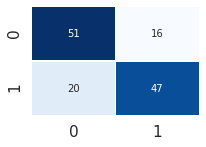

In [ ]:

#Plot 2
#https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred2)
#matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix = matrix.astype('float')

# Build the plot
plt.figure(figsize=(3,2))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2, cbar=None)


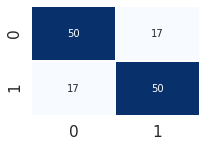

In [ ]:

#Plot 3
#https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred3)
#matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix = matrix.astype('float')

# Build the plot
plt.figure(figsize=(3,2))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2, cbar=None)



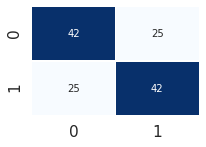

In [ ]:
#Plot 4
#https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred4)
#matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix = matrix.astype('float')

# Build the plot
plt.figure(figsize=(3,2))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2, cbar=None)



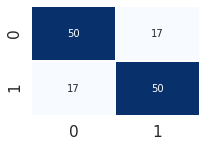

In [ ]:
#Plot 5
#https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred5)
#matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix = matrix.astype('float')

# Build the plot
plt.figure(figsize=(3,2))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2, cbar=None)



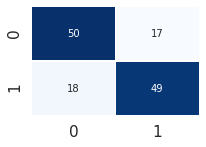

In [ ]:
#Plot 6
#https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred6)
#matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
matrix = matrix.astype('float')

# Build the plot
plt.figure(figsize=(3,2))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2, cbar=None)

In [ ]:
# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['T-shirt/Top','Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Multilayer Perceptron')
plt.show()

Random Forest1
0.7835820895522388
Random Forest2
0.7686567164179104
Logistic Regression
0.746268656716418
KNN
0.6268656716417911
Naive Bayes
0.746268656716418
Perceptron
0.746268656716418
Linear_SVM
0.746268656716418


In [ ]:
Acc_table=pd.DataFrame() 
Acc_table['Model']=['Random Forest','Random Forest 2', 'Logistic Regression', 'KNN', 'Naive Bayes', 'Perceptron']
Acc_table['Parameters']=['n=100','n=300, max features = 0.4','default','n=9','default','max iter=8']
Acc_table['2019 Accuracy']=[ranfor1_acc, ranfor2_acc,logreg_acc,knn_acc,NaiveBay_acc,Perceptron_acc]
Acc_table


,Model,Parameters,2019 Accuracy
0,Random Forest,n=100,0.783582
1,Random Forest 2,"n=300, max features = 0.4",0.731343
2,Logistic Regression,default,0.746269
3,KNN,n=9,0.626866
4,Naive Bayes,default,0.746269
5,Perceptron,max iter=8,0.738806


Running the 2019 Bracket

In [ ]:
###############
# Function to calculate game margin
###############
def game_margin(teama,teamb):
  margin_stat=pd.DataFrame()
  margin_stat['Win_per_diff'] = teama ['Win_per'].values - teamb ['Win_per'].values
  margin_stat['Win_PW5_per_diff'] = teama ['Win_PW5_per'].values - teamb ['Win_PW5_per'].values
  margin_stat['FG_Perc_diff'] = teama ['FG_Perc'].values - teamb ['FG_Perc'].values
  margin_stat['FG3_Perc_diff'] = teama ['FG3_Perc'].values - teamb ['FG3_Perc'].values
  margin_stat['FT_Perc_diff'] = teama ['FT_Perc'].values - teamb ['FT_Perc'].values
  margin_stat['Score_Per_Gm_diff'] = teama ['Score_Per_Gm'].values - teamb ['Score_Per_Gm'].values
  margin_stat['OR_Per_Gm_diff'] = teama ['OR_Per_Gm'].values - teamb ['OR_Per_Gm'].values
  margin_stat['DR_Per_Gm_diff'] = teama ['DR_Per_Gm'].values - teamb ['DR_Per_Gm'].values
  margin_stat['Ast_Per_Gm_diff'] = teama ['Ast_Per_Gm'].values - teamb ['Ast_Per_Gm'].values
  margin_stat['TO_Per_Gm_diff'] = teama ['TO_Per_Gm'].values - teamb ['TO_Per_Gm'].values
  margin_stat['Stl_Per_Gm_diff'] = teama ['Stl_Per_Gm'].values - teamb ['Stl_Per_Gm'].values
  margin_stat['Blk_Per_Gm_diff'] = teama ['Blk_Per_Gm'].values - teamb ['Blk_Per_Gm'].values
  margin_stat['PF_Per_Gm_diff'] = teama ['PF_Per_Gm'].values - teamb ['PF_Per_Gm'].values
  return margin_stat

# Testing function
#test1 = game_margin(tm1,tm2)
#print(test1)

#test2 = game_margin(tm2,tm1)
#print(test2)

In [ ]:
#############################
## Creat function that predicts tournmanet bracket outcome
#############################
def tournament_predict(season,model):
  ########################
  # Breakout tournament by rounds
  ########################
  #season=season
  tourney_seeds=t_seeds[t_seeds['Season']==season]
  tourney_seeds['Sn_Tm'] = tourney_seeds['Season'].astype(str) + tourney_seeds['TeamID'].astype(str)
  tourney_seeds=tourney_seeds.merge(season_detail_summ, on='Sn_Tm', how='left', indicator=False)
  tourney_seeds_short=tourney_seeds[['Seed','TeamID']]

  tourney_slots=t_slots[t_slots['Season']==season]

  # Pre Round
  PreRound=tourney_slots[63:67]

  # First Round (64)
  Round1=tourney_slots[0:32]
  # Top 32
  Round2=tourney_slots[32:48]
  #Sweet 16
  Round3=tourney_slots[48:56]
  #Quarter Final
  Round4=tourney_slots[56:60]
  #Semifinal
  Round5=tourney_slots[60:62]
  #Final
  Round6=tourney_slots[62:63]

  ########################
  # First 4: Detects Pre Round Winner and Adds winners to seeds table
  ########################
  #Identify SS and WS Team Ids
  SS_Team=PreRound.merge(tourney_seeds_short, left_on='StrongSeed', right_on='Seed', how='left', indicator=False)[['TeamID']].values
  PreRound[['SS_Team']]=SS_Team
  WS_Team=PreRound.merge(tourney_seeds_short, left_on='WeakSeed', right_on='Seed', how='left', indicator=False)[['TeamID']].values
  PreRound[['WS_Team']]=WS_Team

  PreRound

  for n in range(len(PreRound)):
    #Strong Seed(Team1) - Week Seed(Team2)
    team1id=PreRound['SS_Team']
    team2id=PreRound['WS_Team']
    team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
    team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
    #Strong Seed(Team1) - Week Seed(Team2)
    a=game_margin(team1stats, team2stats)
    result=model.predict(a)
    if result == 1:
      PreRound[['Winner']]=team1id
    else: 
      PreRound[['Winner']]=team2id
    #Adds Winners to seeds  
    c=PreRound[['Slot','Winner']]
    c.columns=['Seed','TeamID']
  tourney_seeds_short=tourney_seeds_short.append(c, ignore_index=True)

  print(PreRound[['Winner']])

  ########################
  # Detects 1st Round Winner 
  ########################
  SS_Team=Round1.merge(tourney_seeds_short, left_on='StrongSeed', right_on='Seed', how='left', indicator=False)[['TeamID']].values
  Round1[['SS_Team']]=SS_Team
  WS_Team=Round1.merge(tourney_seeds_short, left_on='WeakSeed', right_on='Seed', how='left', indicator=False)[['TeamID']].values
  Round1[['WS_Team']]=WS_Team
  Round1['Winner']=0000
  for n in range(len(Round1)):
    #Strong Seed(Team1) - Week Seed(Team2)
    
    team1id=Round1['SS_Team']
    team2id=Round1['WS_Team']
    #print('team1 id', team1id.iloc[n])
    #print('team2 id',team2id.iloc[n])
    team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
    team1stats=team1stats[['Win_per', 'Win_PW5_per',
        'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
        'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
        'PF_Per_Gm']]
    team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
    team2stats=team2stats[['Win_per', 'Win_PW5_per',
        'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
        'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
        'PF_Per_Gm']]
    #print('team1 stats', team1stats)
  # print('team2 stats',team2stats)
    #Strong Seed(Team1) - Week Seed(Team2)
    a=game_margin(team1stats, team2stats)
    result=model.predict(a)
    #print(model.predict_proba(a))
    print(result)
    if result == 1:
      Round1['Winner'].iloc[n]=team1id.iloc[n]
      #print(team1id.iloc[n])
    else: 
      Round1['Winner'].iloc[n]=team2id.iloc[n]
      #print(team2id.iloc[n])

    #print(Round1)

  # Clean Round 1 Table
  Round1Winners=Round1[['Slot','Winner']]
  Round1Winners=Round1Winners.merge(team_names, left_on='Winner', right_on='TeamID', how='left', indicator=False)
  print('Your Top 32')
  print(Round1Winners[['TeamName']])

  ########################
  # Detects 2nd Round Winner 
  ########################
  SS_Team=Round2.merge(Round1Winners, left_on='StrongSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
  Round2['SS_Team']=SS_Team

  WS_Team=Round2.merge(Round1Winners, left_on='WeakSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
  Round2['WS_Team']=WS_Team

  #Create Winner Column
  Round2['Winner']=0000


  for n in range(len(Round2)):
    #Strong Seed(Team1) - Week Seed(Team2)
    
    team1id=Round2['SS_Team']
    team2id=Round2['WS_Team']
    #print('team1 id', team1id.iloc[n])
    #print('team2 id',team2id.iloc[n])
    team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
    team1stats=team1stats[['Win_per', 'Win_PW5_per',
        'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
        'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
        'PF_Per_Gm']]
    team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
    team2stats=team2stats[['Win_per', 'Win_PW5_per',
        'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
        'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
        'PF_Per_Gm']]
    #print('team1 stats', team1stats)
  # print('team2 stats',team2stats)
    #Strong Seed(Team1) - Week Seed(Team2)
    a=game_margin(team1stats, team2stats)
    result=model.predict(a)
    #print(model.predict_proba(a))
    print(result)
    if result == 1:
      Round2['Winner'].iloc[n]=team1id.iloc[n]
      #print(team1id.iloc[n])
    else: 
      Round2['Winner'].iloc[n]=team2id.iloc[n]
      #print(team2id.iloc[n])

  # Clean Round 2 Table
  Round2Winners=Round2[['Slot','Winner']]
  Round2Winners=Round2Winners.merge(team_names, left_on='Winner', right_on='TeamID', how='left', indicator=False)
  print('Your Sweet 16 are')
  print(Round2Winners[['TeamName']])

  ########################
  # Detects 3rd Round Winner (Sweet 16)
  ########################
  SS_Team=Round3.merge(Round2Winners, left_on='StrongSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
  Round3['SS_Team']=SS_Team

  WS_Team=Round3.merge(Round2Winners, left_on='WeakSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
  Round3['WS_Team']=WS_Team

  #Create Winner Column
  Round3['Winner']=0000

  for n in range(len(Round3)):
    #Strong Seed(Team1) - Week Seed(Team2)
    
    team1id=Round3['SS_Team']
    team2id=Round3['WS_Team']
    print('team1 id', team1id.iloc[n])
    print('team2 id',team2id.iloc[n])
    team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
    team1stats=team1stats[['Win_per', 'Win_PW5_per',
        'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
        'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
        'PF_Per_Gm']]
    team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
    team2stats=team2stats[['Win_per', 'Win_PW5_per',
        'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
        'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
        'PF_Per_Gm']]
    #print('team1 stats', team1stats)
  # print('team2 stats',team2stats)
    #Strong Seed(Team1) - Week Seed(Team2)
    a=game_margin(team1stats, team2stats)
    result=model.predict(a)
    #print(model.predict_proba(a))
    print(result)
    if result == 1:
      Round3['Winner'].iloc[n]=team1id.iloc[n]
      #print(team1id.iloc[n])
    else: 
      Round3['Winner'].iloc[n]=team2id.iloc[n]
      #print(team2id.iloc[n])

  # Clean Round 2 Table
  Round3Winners=Round3[['Slot','Winner']]
  Round3Winners=Round3Winners.merge(team_names, left_on='Winner', right_on='TeamID', how='left', indicator=False)
  print('Your quarter finalists are')
  print(Round3Winners[['TeamName']])

  ########################
  # Detects 4th Round Winner (Quarter Finals)
  ########################
  SS_Team=Round4.merge(Round3Winners, left_on='StrongSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
  Round4['SS_Team']=SS_Team

  WS_Team=Round4.merge(Round3Winners, left_on='WeakSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
  Round4['WS_Team']=WS_Team

  #Create Winner Column
  Round4['Winner']=0000

  for n in range(len(Round4)):
    #Strong Seed(Team1) - Week Seed(Team2)
    
    team1id=Round4['SS_Team']
    team2id=Round4['WS_Team']
    print('team1 id', team1id.iloc[n])
    print('team2 id',team2id.iloc[n])
    team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
    team1stats=team1stats[['Win_per', 'Win_PW5_per',
        'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
        'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
        'PF_Per_Gm']]
    team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
    team2stats=team2stats[['Win_per', 'Win_PW5_per',
        'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
        'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
        'PF_Per_Gm']]
    #print('team1 stats', team1stats)
  # print('team2 stats',team2stats)
    #Strong Seed(Team1) - Week Seed(Team2)
    a=game_margin(team1stats, team2stats)
    result=model.predict(a)

    if result == 1:
      Round4['Winner'].iloc[n]=team1id.iloc[n]
      #print(team1id.iloc[n])
    else: 
      Round4['Winner'].iloc[n]=team2id.iloc[n]
      #print(team2id.iloc[n])
    print(result)
  # Clean Round 2 Table
  Round4Winners=Round4[['Slot','Winner']]
  Round4Winners=Round4Winners.merge(team_names, left_on='Winner', right_on='TeamID', how='left', indicator=False)
  print('Your Final Four are')
  print(Round4Winners[['TeamName']])

  ########################
  # Detects 5th Round Winner (Final Four)
  ########################
  SS_Team=Round5.merge(Round4Winners, left_on='StrongSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
  Round5['SS_Team']=SS_Team

  WS_Team=Round5.merge(Round4Winners, left_on='WeakSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
  Round5['WS_Team']=WS_Team

  #Create Winner Column
  Round5['Winner']=0000

  for n in range(len(Round5)):
    #Strong Seed(Team1) - Week Seed(Team2)
    
    team1id=Round5['SS_Team']
    team2id=Round5['WS_Team']
    print('team1 id', team1id.iloc[n])
    print('team2 id',team2id.iloc[n])
    team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
    team1stats=team1stats[['Win_per', 'Win_PW5_per',
        'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
        'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
        'PF_Per_Gm']]
    team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
    team2stats=team2stats[['Win_per', 'Win_PW5_per',
        'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
        'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
        'PF_Per_Gm']]
    #print('team1 stats', team1stats)
  # print('team2 stats',team2stats)
    #Strong Seed(Team1) - Week Seed(Team2)
    a=game_margin(team1stats, team2stats)
    result=model.predict(a)
    #print(model.predict_proba(a))
    print(result)
    if result == 1:
      Round5['Winner'].iloc[n]=team1id.iloc[n]
      #print(team1id.iloc[n])
    else: 
      Round5['Winner'].iloc[n]=team2id.iloc[n]
      #print(team2id.iloc[n])

  # Clean Round 2 Table
  Round5Winners=Round5[['Slot','Winner']]
  Round5Winners=Round5Winners.merge(team_names, left_on='Winner', right_on='TeamID', how='left', indicator=False)
  print('Your Finalists are')
  print(Round5Winners[['TeamName']])

  ########################
  # Detects 6th Round Winner (Championship)
  ########################
  SS_Team=Round6.merge(Round5Winners, left_on='StrongSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
  Round6['SS_Team']=SS_Team

  WS_Team=Round6.merge(Round5Winners, left_on='WeakSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
  Round6['WS_Team']=WS_Team

  #Create Winner Column
  Round6['Winner']=0000

  for n in range(len(Round6)):
    #Strong Seed(Team1) - Week Seed(Team2)
    
    team1id=Round6['SS_Team']
    team2id=Round6['WS_Team']
    print('team1 id', team1id.iloc[n])
    print('team2 id',team2id.iloc[n])
    team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
    team1stats=team1stats[['Win_per', 'Win_PW5_per',
        'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
        'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
        'PF_Per_Gm']]
    team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
    team2stats=team2stats[['Win_per', 'Win_PW5_per',
        'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
        'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
        'PF_Per_Gm']]
    #print('team1 stats', team1stats)
  # print('team2 stats',team2stats)
    #Strong Seed(Team1) - Week Seed(Team2)
    a=game_margin(team1stats, team2stats)
    result=model.predict(a)
    #print(model.predict_proba(a))
    print(result)
    if result == 1:
      Round6['Winner'].iloc[n]=team1id.iloc[n]
      #print(team1id.iloc[n])
    else: 
      Round6['Winner'].iloc[n]=team2id.iloc[n]
      #print(team2id.iloc[n])

  # Clean Round 2 Table
  Champion=Round6[['Slot','Winner']]

  ########################
  # The Winner is...
  ########################

  Champion=Round6[['Slot','Winner']]
  Champion=Champion.merge(team_names, left_on='Winner', right_on='TeamID', how='left', indicator=False)

  print('Your Top 32 are')
  print(Round1Winners[['TeamName']])
  print('Your Sweet 16 are')
  print(Round2Winners[['TeamName']])
  print('Your quarter finalists are')
  print(Round3Winners[['TeamName']])
  print('Your Final Four are')
  print(Round4Winners[['TeamName']])
  print('Your Finalists are')
  print(Round5Winners[['TeamName']])
  print('Your Champion is')
  print(Champion[['TeamName']])

In [ ]:
########################
## Run the function 2019
########################
# Possible Models
#random_forest, random_forest2,logreg, knn, gaussian, perceptron, linear_svc
#tournament_predict(2019,random_forest)
# Tennessee

#tournament_predict(2019,random_forest2)
# Duke

#tournament_predict(2019,logreg)
# Duke

#tournament_predict(2019,knn)
# Duke

#tournament_predict(2019,gaussian)
# Gonzaga

#tournament_predict(2019,perceptron)
# North Carolina



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



      Winner
2247    1125
2248    1295
2249    1113
2250    1192
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[1]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[0]
[0]
Your Top 32
          TeamName
0             Duke
1      Michigan St
2              LSU
3    Virginia Tech
4   Mississippi St
5          Belmont
6       Louisville
7              UCF
8          Gonzaga
9         Michigan
10      Texas Tech
11      Florida St
12       Murray St
13         Buffalo
14          Nevada
15          Baylor
16  North Carolina
17        Kentucky
18         Houston
19          Kansas
20          Auburn
21         Iowa St
22         Wofford
23         Utah St
24        Virginia
25       Tennessee
26          Purdue
27       UC Irvine
28       Wisconsin
29       Villanova
30            Iowa
31        Oklahoma
[1]
[1]
[0]
[0]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[1]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

[1]
[1]
[0]
Your Sweet 16 are
          TeamName
0             Duke
1      Michigan St
2          Belmont
3   Mississippi St
4          Gonzaga
5           Nevada
6          Buffalo
7        Murray St
8   North Carolina
9         Kentucky
10         Iowa St
11          Auburn
12        Virginia
13       Tennessee
14          Purdue
15       Wisconsin
team1 id 1181
team2 id 1280
[1]
team1 id 1277
team2 id 1125
[0]
team1 id 1211
team2 id 1293
[1]
team1 id 1305
team2 id 1138
[0]
team1 id 1314
team2 id 1120
[1]
team1 id 1246
team2 id 1235
[0]
team1 id 1438
team2 id 1458
[1]
team1 id 1397
team2 id 1345
[1]
Your quarter finalists are
         TeamName
0            Duke
1         Belmont
2         Gonzaga
3         Buffalo
4  North Carolina
5         Iowa St
6        Virginia
7       Tennessee
team1 id 1181
team2 id 1125
[1]
team1 id 1211
team2 id 1138
[1]
team1 id 1314
team2 id 1235
[1]
team1 id 1438
team2 id 1397
[0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

Your Final Four are
         TeamName
0            Duke
1         Gonzaga
2  North Carolina
3       Tennessee
team1 id 1181
team2 id 1211
[0]
team1 id 1314
team2 id 1397
[1]
Your Finalists are
         TeamName
0         Gonzaga
1  North Carolina
team1 id 1211
team2 id 1314
[0]
Your Top 32 are
          TeamName
0             Duke
1      Michigan St
2              LSU
3    Virginia Tech
4   Mississippi St
5          Belmont
6       Louisville
7              UCF
8          Gonzaga
9         Michigan
10      Texas Tech
11      Florida St
12       Murray St
13         Buffalo
14          Nevada
15          Baylor
16  North Carolina
17        Kentucky
18         Houston
19          Kansas
20          Auburn
21         Iowa St
22         Wofford
23         Utah St
24        Virginia
25       Tennessee
26          Purdue
27       UC Irvine
28       Wisconsin
29       Villanova
30            Iowa
31        Oklahoma
Your Sweet 16 are
          TeamName
0             Duke
1      Michigan St
2  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:310: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:313: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:316: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
########################
## Run the function 2021
########################
# Possible Models
#random_forest, random_forest2,logreg, knn, gaussian, perceptron, linear_svc
tournament_predict(2021,random_forest)
# Baylor

#tournament_predict(2021,random_forest2)
# Baylor

#tournament_predict(2021,logreg)
# Baylor

#tournament_predict(2021,knn)
# Baylor

#tournament_predict(2021,gaussian)
# Gonzaga

#tournament_predict(2021,perceptron)
# Gonzaga

#tournament_predict(2021,linear_svc)
# Baylor

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



      Winner
2314    1417
2315    1411
2316    1455
2317    1313
[1]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

[1]
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[0]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

[1]
[0]
[1]
[1]
[1]
[1]
[0]
[1]
[1]
[1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:6

Your Top 32
            TeamName
0           Michigan
1            Alabama
2              Texas
3         Florida St
4           Colorado
5               UCLA
6        Connecticut
7                LSU
8            Gonzaga
9               Iowa
10            Kansas
11          Virginia
12  UC Santa Barbara
13               USC
14            Oregon
15          Oklahoma
16          Illinois
17           Houston
18     West Virginia
19       Oklahoma St
20         Tennessee
21          Syracuse
22           Clemson
23      Georgia Tech
24            Baylor
25           Ohio St
26          Arkansas
27            Purdue
28          Winthrop
29        Texas Tech
30           Florida
31    North Carolina
[1]
[1]
[0]
[1]
[1]
[1]
[1]
[1]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/

[1]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
Your Sweet 16 are
      TeamName
0     Michigan
1      Alabama
2         UCLA
3   Florida St
4      Gonzaga
5         Iowa
6       Kansas
7     Virginia
8     Illinois
9      Houston
10    Syracuse
11   Tennessee
12      Baylor
13     Ohio St
14    Arkansas
15    Winthrop
team1 id 1276
team2 id 1199
[1]
team1 id 1104
team2 id 1417
[1]
team1 id 1211
team2 id 1438
[1]
team1 id 1234
team2 id 1242
[1]
team1 id 1228
team2 id 1397
[0]
team1 id 1222
team2 id 1393


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

[1]
team1 id 1124
team2 id 1457
[1]
team1 id 1326
team2 id 1116
[1]
Your quarter finalists are
    TeamName
0   Michigan
1    Alabama
2    Gonzaga
3       Iowa
4  Tennessee
5    Houston
6     Baylor
7    Ohio St
team1 id 1276
team2 id 1104
[1]
team1 id 1211
team2 id 1234
[1]
team1 id 1397
team2 id 1222
[0]
team1 id 1124
team2 id 1326
[1]
Your Final Four are
   TeamName
0  Michigan
1   Gonzaga
2   Houston
3    Baylor
team1 id 1276
team2 id 1211
[0]
team1 id 1222
team2 id 1124
[0]
Your Finalists are
  TeamName
0  Gonzaga
1   Baylor
team1 id 1211
team2 id 1124
[0]
Your Top 32 are
            TeamName
0           Michigan
1            Alabama
2              Texas
3         Florida St
4           Colorado
5               UCLA
6        Connecticut
7                LSU
8            Gonzaga
9               Iowa
10            Kansas
11          Virginia
12  UC Santa Barbara
13               USC
14            Oregon
15          Oklahoma
16          Illinois
17           Houston
18     West Virgi

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/

Predictor broken down by Rounds

In [ ]:
########################
# Breakout tournament by rounds
########################
season=2019
tourney_seeds=t_seeds[t_seeds['Season']==season]
tourney_seeds['Sn_Tm'] = tourney_seeds['Season'].astype(str) + tourney_seeds['TeamID'].astype(str)
tourney_seeds=tourney_seeds.merge(season_detail_summ, on='Sn_Tm', how='left', indicator=False)
tourney_seeds_short=tourney_seeds[['Seed','TeamID']]

tourney_slots=t_slots[t_slots['Season']==season]

# Pre Round
PreRound=tourney_slots[63:67]

# First Round (64)
Round1=tourney_slots[0:32]
# Top 32
Round2=tourney_slots[32:48]
#Sweet 16
Round3=tourney_slots[48:56]
#Quarter Final
Round4=tourney_slots[56:60]
#Semifinal
Round5=tourney_slots[60:62]
#Final
Round6=tourney_slots[62:63]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Identify SS and WS Team Ids
#SS_Team=PreRound.merge(tourney_seeds_short, left_on='StrongSeed', right_on='Seed', how='left', indicator=False)[['TeamID']].values
#PreRound[['SS_Team']]=SS_Team
#WS_Team=PreRound.merge(tourney_seeds_short, left_on='WeakSeed', right_on='Seed', how='left', indicator=False)[['TeamID']].values
#PreRound[['WS_Team']]=WS_Team

#PreRound

In [ ]:
########################
# First 4: Detects Pre Round Winner and Adds winners to seeds table
########################
#Identify SS and WS Team Ids
SS_Team=PreRound.merge(tourney_seeds_short, left_on='StrongSeed', right_on='Seed', how='left', indicator=False)[['TeamID']].values
PreRound[['SS_Team']]=SS_Team
WS_Team=PreRound.merge(tourney_seeds_short, left_on='WeakSeed', right_on='Seed', how='left', indicator=False)[['TeamID']].values
PreRound[['WS_Team']]=WS_Team

PreRound

for n in range(len(PreRound)):
  #Strong Seed(Team1) - Week Seed(Team2)
  team1id=PreRound['SS_Team']
  team2id=PreRound['WS_Team']
  team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
  team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
  #Strong Seed(Team1) - Week Seed(Team2)
  a=game_margin(team1stats, team2stats)
  result=random_forest.predict(a)
  if result == 1:
    PreRound[['Winner']]=team1id
  else: 
    PreRound[['Winner']]=team2id
  #Adds Winners to seeds  
  c=PreRound[['Slot','Winner']]
  c.columns=['Seed','TeamID']
tourney_seeds_short=tourney_seeds_short.append(c, ignore_index=True)

print(PreRound[['Winner']])
  

      Winner
2247    1125
2248    1295
2249    1113
2250    1192


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [ ]:
########################
# Detects 1st Round Winner 
########################
SS_Team=Round1.merge(tourney_seeds_short, left_on='StrongSeed', right_on='Seed', how='left', indicator=False)[['TeamID']].values
Round1[['SS_Team']]=SS_Team
WS_Team=Round1.merge(tourney_seeds_short, left_on='WeakSeed', right_on='Seed', how='left', indicator=False)[['TeamID']].values
Round1[['WS_Team']]=WS_Team
Round1['Winner']=0000
for n in range(len(Round1)):
  #Strong Seed(Team1) - Week Seed(Team2)
  
  team1id=Round1['SS_Team']
  team2id=Round1['WS_Team']
  #print('team1 id', team1id.iloc[n])
  #print('team2 id',team2id.iloc[n])
  team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
  team1stats=team1stats[['Win_per', 'Win_PW5_per',
       'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
       'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
       'PF_Per_Gm']]
  team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
  team2stats=team2stats[['Win_per', 'Win_PW5_per',
       'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
       'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
       'PF_Per_Gm']]
  #print('team1 stats', team1stats)
 # print('team2 stats',team2stats)
  #Strong Seed(Team1) - Week Seed(Team2)
  a=game_margin(team1stats, team2stats)
  result=random_forest.predict(a)
  print(random_forest.predict_proba(a))
  print(result)
  if result == 1:
    Round1['Winner'].iloc[n]=team1id.iloc[n]
    #print(team1id.iloc[n])
  else: 
    Round1['Winner'].iloc[n]=team2id.iloc[n]
    #print(team2id.iloc[n])

  #print(Round1)

 # Clean Round 1 Table
Round1Winners=Round1[['Slot','Winner']]
Round1Winners=Round1Winners.merge(team_names, left_on='Winner', right_on='TeamID', how='left', indicator=False)
print('Your Sweet 16 are')
print(Round1Winners[['TeamName']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

[[0.17 0.83]]
[1]
[[0.08 0.92]]
[1]
[[0.33 0.67]]
[1]
[[0.36 0.64]]
[1]
[[0.46 0.54]]
[1]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

[[0.47 0.53]]
[1]
[[0.58 0.42]]
[0]
[[0.43 0.57]]
[1]
[[0.07 0.93]]
[1]
[[0.27 0.73]]
[1]
[[0.37 0.63]]
[1]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

[[0.25 0.75]]
[1]
[[0.8 0.2]]
[0]
[[0.3 0.7]]
[1]
[[0.2 0.8]]
[1]
[[0.54 0.46]]
[0]
[[0.15 0.85]]
[1]
[[0.22 0.78]]
[1]
[[0.41 0.59]]
[1]
[[0.42 0.58]]
[1]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

[[0.36 0.64]]
[1]
[[0.25 0.75]]
[1]
[[0.25 0.75]]
[1]
[[0.56 0.44]]
[0]
[[0.08 0.92]]
[1]
[[0.11 0.89]]
[1]
[[0.35 0.65]]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

[1]
[[0.52 0.48]]
[0]
[[0.51 0.49]]
[0]
[[0.47 0.53]]
[1]
[[0.38 0.62]]
[1]
[[0.33 0.67]]
[1]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

2184    1181
2185    1277
2186    1261
2187    1439
2188    1280
2189    1268
2190    1278
2191    1433
2192    1211
2193    1276
2194    1403
2195    1199
2196    1293
2197    1138
2198    1305
2199    1124
2200    1314
2201    1246
2202    1222
2203    1242
2204    1120
2205    1235
2206    1459
2207    1449
2208    1438
2209    1397
2210    1345
2211    1414
2212    1332
2213    1437
2214    1153
2215    1279
Name: Winner, dtype: int64

In [ ]:
########################
# Detects 2nd Round Winner 
########################
SS_Team=Round2.merge(Round1Winners, left_on='StrongSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
Round2['SS_Team']=SS_Team

WS_Team=Round2.merge(Round1Winners, left_on='WeakSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
Round2['WS_Team']=WS_Team

#Create Winner Column
Round2['Winner']=0000


for n in range(len(Round2)):
  #Strong Seed(Team1) - Week Seed(Team2)
  
  team1id=Round2['SS_Team']
  team2id=Round2['WS_Team']
  #print('team1 id', team1id.iloc[n])
  #print('team2 id',team2id.iloc[n])
  team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
  team1stats=team1stats[['Win_per', 'Win_PW5_per',
       'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
       'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
       'PF_Per_Gm']]
  team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
  team2stats=team2stats[['Win_per', 'Win_PW5_per',
       'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
       'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
       'PF_Per_Gm']]
  #print('team1 stats', team1stats)
 # print('team2 stats',team2stats)
  #Strong Seed(Team1) - Week Seed(Team2)
  a=game_margin(team1stats, team2stats)
  result=random_forest.predict(a)
  print(random_forest.predict_proba(a))
  print(result)
  if result == 1:
    Round2['Winner'].iloc[n]=team1id.iloc[n]
    #print(team1id.iloc[n])
  else: 
    Round2['Winner'].iloc[n]=team2id.iloc[n]
    #print(team2id.iloc[n])

# Clean Round 2 Table
Round2Winners=Round2[['Slot','Winner']]
Round2Winners=Round4Winners.merge(team_names, left_on='Winner', right_on='TeamID', how='left', indicator=False)
print('Your Sweet 16 are')
print(Round2Winners[['TeamName']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

[[0.15 0.85]]
[1]
[[0.07 0.93]]
[1]
[[0.32 0.68]]
[1]
[[0.49 0.51]]
[1]
[[0.19 0.81]]
[1]
[[0.35 0.65]]
[1]
[[0.49 0.51]]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

[1]
[[0.34 0.66]]
[1]
[[0.46 0.54]]
[1]
[[0.27 0.73]]
[1]
[[0.58 0.42]]
[0]
[[0.66 0.34]]
[0]
[[0.17 0.83]]
[1]
[[0.22 0.78]]
[1]
[[0.31 0.69]]
[1]
[[0.49 0.51]]
[1]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

,Slot,Winner
2216,R2W1,1181
2217,R2W2,1277
2218,R2W3,1261
2219,R2W4,1439
2220,R2X1,1211
2221,R2X2,1276
2222,R2X3,1403
2223,R2X4,1199
2224,R2Y1,1314
2225,R2Y2,1246


In [ ]:
########################
# Detects 3rd Round Winner (Sweet 16)
########################
SS_Team=Round3.merge(Round2Winners, left_on='StrongSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
Round3['SS_Team']=SS_Team

WS_Team=Round3.merge(Round2Winners, left_on='WeakSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
Round3['WS_Team']=WS_Team

#Create Winner Column
Round3['Winner']=0000

for n in range(len(Round3)):
  #Strong Seed(Team1) - Week Seed(Team2)
  
  team1id=Round3['SS_Team']
  team2id=Round3['WS_Team']
  print('team1 id', team1id.iloc[n])
  print('team2 id',team2id.iloc[n])
  team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
  team1stats=team1stats[['Win_per', 'Win_PW5_per',
       'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
       'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
       'PF_Per_Gm']]
  team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
  team2stats=team2stats[['Win_per', 'Win_PW5_per',
       'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
       'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
       'PF_Per_Gm']]
  #print('team1 stats', team1stats)
 # print('team2 stats',team2stats)
  #Strong Seed(Team1) - Week Seed(Team2)
  a=game_margin(team1stats, team2stats)
  result=random_forest.predict(a)
  print(random_forest.predict_proba(a))
  print(result)
  if result == 1:
    Round3['Winner'].iloc[n]=team1id.iloc[n]
    #print(team1id.iloc[n])
  else: 
    Round3['Winner'].iloc[n]=team2id.iloc[n]
    #print(team2id.iloc[n])

# Clean Round 2 Table
Round3Winners=Round3[['Slot','Winner']]
Round3Winners=Round4Winners.merge(team_names, left_on='Winner', right_on='TeamID', how='left', indicator=False)
print('Your quarter finalists are')
print(Round3Winners[['TeamName']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

team1 id 1181
team2 id 1439
[[0.37 0.63]]
[1]
team1 id 1277
team2 id 1261
[[0.49 0.51]]
[1]
team1 id 1211
team2 id 1199
[[0.35 0.65]]
[1]
team1 id 1276
team2 id 1403
[[0.46 0.54]]
[1]
team1 id 1314
team2 id 1120
[[0.39 0.61]]
[1]
team1 id 1246
team2 id 1235
[[0.27 0.73]]
[1]
team1 id 1438
team2 id 1414
[[0.23 0.77]]
[1]
team1 id 1397
team2 id 1345
[[0.2 0.8]]
[1]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

,Slot,Winner
2232,R3W1,1181
2233,R3W2,1277
2234,R3X1,1211
2235,R3X2,1276
2236,R3Y1,1314
2237,R3Y2,1246
2238,R3Z1,1438
2239,R3Z2,1397


In [ ]:
########################
# Detects 4th Round Winner (Quarter Finals)
########################
SS_Team=Round4.merge(Round3Winners, left_on='StrongSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
Round4['SS_Team']=SS_Team

WS_Team=Round4.merge(Round3Winners, left_on='WeakSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
Round4['WS_Team']=WS_Team

#Create Winner Column
Round4['Winner']=0000

for n in range(len(Round4)):
  #Strong Seed(Team1) - Week Seed(Team2)
  
  team1id=Round4['SS_Team']
  team2id=Round4['WS_Team']
  print('team1 id', team1id.iloc[n])
  print('team2 id',team2id.iloc[n])
  team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
  team1stats=team1stats[['Win_per', 'Win_PW5_per',
       'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
       'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
       'PF_Per_Gm']]
  team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
  team2stats=team2stats[['Win_per', 'Win_PW5_per',
       'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
       'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
       'PF_Per_Gm']]
  #print('team1 stats', team1stats)
 # print('team2 stats',team2stats)
  #Strong Seed(Team1) - Week Seed(Team2)
  a=game_margin(team1stats, team2stats)
  result=random_forest.predict(a)

  if result == 1:
    Round4['Winner'].iloc[n]=team1id.iloc[n]
    #print(team1id.iloc[n])
  else: 
    Round4['Winner'].iloc[n]=team2id.iloc[n]
    #print(team2id.iloc[n])
  print(result)
# Clean Round 2 Table
Round4Winners=Round4[['Slot','Winner']]
Round4Winners=Round4Winners.merge(team_names, left_on='Winner', right_on='TeamID', how='left', indicator=False)
print('Your Final Four are')
print(Round4Winners[['TeamName']])

team1 id 1181
team2 id 1277
[1]
team1 id 1211
team2 id 1276
[1]
team1 id 1314
team2 id 1246
[1]
team1 id 1438
team2 id 1397
[0]
Your Finalists are
         TeamName
0            Duke
1         Gonzaga
2  North Carolina
3       Tennessee


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

In [ ]:
########################
# Detects 5th Round Winner (Final Four)
########################
SS_Team=Round5.merge(Round4Winners, left_on='StrongSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
Round5['SS_Team']=SS_Team

WS_Team=Round5.merge(Round4Winners, left_on='WeakSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
Round5['WS_Team']=WS_Team

#Create Winner Column
Round5['Winner']=0000

for n in range(len(Round5)):
  #Strong Seed(Team1) - Week Seed(Team2)
  
  team1id=Round5['SS_Team']
  team2id=Round5['WS_Team']
  print('team1 id', team1id.iloc[n])
  print('team2 id',team2id.iloc[n])
  team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
  team1stats=team1stats[['Win_per', 'Win_PW5_per',
       'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
       'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
       'PF_Per_Gm']]
  team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
  team2stats=team2stats[['Win_per', 'Win_PW5_per',
       'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
       'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
       'PF_Per_Gm']]
  #print('team1 stats', team1stats)
 # print('team2 stats',team2stats)
  #Strong Seed(Team1) - Week Seed(Team2)
  a=game_margin(team1stats, team2stats)
  result=random_forest.predict(a)
  print(random_forest.predict_proba(a))
  print(result)
  if result == 1:
    Round5['Winner'].iloc[n]=team1id.iloc[n]
    #print(team1id.iloc[n])
  else: 
    Round5['Winner'].iloc[n]=team2id.iloc[n]
    #print(team2id.iloc[n])

# Clean Round 2 Table
Round5Winners=Round5[['Slot','Winner']]
Round5Winners=Round5Winners.merge(team_names, left_on='Winner', right_on='TeamID', how='left', indicator=False)
print('Your Finalists are')
print(Round5Winners[['TeamName']])

team1 id 1181
team2 id 1211
[[0.37 0.63]]
[1]
team1 id 1314
team2 id 1397
[[0.55 0.45]]
[0]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/p

,Slot,Winner
2244,R5WX,1181
2245,R5YZ,1397


Your Champion is
    TeamName
0       Duke
1  Tennessee


In [ ]:
########################
# Detects 6th Round Winner (Championship)
########################
SS_Team=Round6.merge(Round5Winners, left_on='StrongSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
Round6['SS_Team']=SS_Team

WS_Team=Round6.merge(Round5Winners, left_on='WeakSeed', right_on='Slot', how='left', indicator=False)['Winner'].values
Round6['WS_Team']=WS_Team

#Create Winner Column
Round6['Winner']=0000

for n in range(len(Round6)):
  #Strong Seed(Team1) - Week Seed(Team2)
  
  team1id=Round6['SS_Team']
  team2id=Round6['WS_Team']
  print('team1 id', team1id.iloc[n])
  print('team2 id',team2id.iloc[n])
  team1stats=tourney_seeds[tourney_seeds['TeamID']==team1id.iloc[n]]
  team1stats=team1stats[['Win_per', 'Win_PW5_per',
       'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
       'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
       'PF_Per_Gm']]
  team2stats=tourney_seeds[tourney_seeds['TeamID']==team2id.iloc[n]]
  team2stats=team2stats[['Win_per', 'Win_PW5_per',
       'FG_Perc', 'FG3_Perc', 'FT_Perc', 'Score_Per_Gm', 'OR_Per_Gm',
       'DR_Per_Gm', 'Ast_Per_Gm', 'TO_Per_Gm', 'Stl_Per_Gm', 'Blk_Per_Gm',
       'PF_Per_Gm']]
  #print('team1 stats', team1stats)
 # print('team2 stats',team2stats)
  #Strong Seed(Team1) - Week Seed(Team2)
  a=game_margin(team1stats, team2stats)
  result=random_forest.predict(a)
  print(random_forest.predict_proba(a))
  print(result)
  if result == 1:
    Round6['Winner'].iloc[n]=team1id.iloc[n]
    #print(team1id.iloc[n])
  else: 
    Round6['Winner'].iloc[n]=team2id.iloc[n]
    #print(team2id.iloc[n])

# Clean Round 2 Table
Champion=Round6[['Slot','Winner']]

team1 id 1181
team2 id 1397
[[0.49 0.51]]
[1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [ ]:
########################
# The Winner is...
########################

Champion=Round6[['Slot','Winner']]
Champion=Champion.merge(team_names, left_on='Winner', right_on='TeamID', how='left', indicator=False)
print('Your Champion is')
print(Champion[['TeamName']])

Your Champion is
  TeamName
0     Duke
